# Prepare Data

In [5]:
#Import everything
import test_manifold_algorithms as tma
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from utils import subset_df, plot_in_fig

2024-07-22 16:43:35.202060: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-22 16:43:35.208360: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-22 16:43:35.314260: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-22 16:43:37.523908: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
"""Clear Directory"""
#Careful. This will reset all of the resutls that we have collected /yunity/arusty/Graph-Manifold-Alignment/ManifoldData/S-curve/Base_Line_Scores(N7172)_AP(0.05-0.1-0.15-0.2-0.3-0.5)_47.npy
##tma.clear_directory(text_curater="Base_Line_Scores") #, not_text=[]

#Converts old way of storing files to the new - if any
#tma.change_old_files_to_new()

Preparing to delete 1 files
First 10 file names to be deleted
-------------------------------------------------
['/yunity/arusty/Graph-Manifold-Alignment/ManifoldData/seeds/Base_Line_Scores(e42)_AP(0.05-0.5-0.1-0.2-0.15)_38.npy']


Files Deleted.


True

In [3]:
"""Practice Tests to Run"""
test = tma.test_manifold_algorithms(csv_file="seeds.csv", split= "skewed", percent_of_anchors= [0.2], verbose=2, random_state= 42)
#print(f"Anchors : {test.anchors}")
#print(f"KNN range {test.knn_range}")
#test.run_SPUD_tests()
#test.run_CSPUD_tests()
#test.run_DIG_tests(predict = False)
#test.run_NAMA_tests()
#test.run_DTA_tests()
#test.run_SSMA_tests()
#test.run_MAGAN_tests()
test.run_KNN_tests()
#test.run_JLMA_tests()
#test.run_PCR_tests()
#test.run_DIG_Conections_tests(page_ranks=["None"], predict = False)
#test.run_CSPUD_tests(operations= ["log"])


 
 
---------------------------       Initalizing class with seeds.csv data       ---------------------------

Splitting the data in a skewed fashion
Split A features shape: (199, 3)
Split B Features shape (199, 4)
MDS initialized with 3 components
The knn values are: (2, 6, 10, 14, 18, 22, 26, 30, 34, 38)

--------------------------------------   Base Line Tests seeds   --------------------------------------

KNN 2
    Classification Score trained on A 0.6683417085427136
    Classification Score trained on B 0.6180904522613065
KNN 6
    Classification Score trained on A 0.7035175879396985
    Classification Score trained on B 0.6834170854271356
KNN 10
    Classification Score trained on A 0.6984924623115578
    Classification Score trained on B 0.7085427135678392
KNN 14
    Classification Score trained on A 0.7185929648241206
    Classification Score trained on B 0.7236180904522613
KNN 18
    Classification Score trained on A 0.7286432160804021
    Classification Score trained on B 0

True

In [2]:
#Veiwing with DataFrame
df = tma.upload_to_DataFrame()

#Add a combined metric to help see (The closer to 1 the better)
df["Combined_Metric"] = df["Cross_Embedding_KNN"] - df["FOSCTTM"]

#Save the Data Frame
df.to_csv(os.getcwd()[:-12] + "ManifoldData/Data_DataFrame.csv", index=False, na_rep='NaN')

In [6]:
#If there is no new data, we could just read in the old csvfile
df = pd.read_csv(os.getcwd()[:-12] + "ManifoldData/Data_DataFrame.csv", keep_default_na=False, na_values=['', 'NaN'], index_col= None)

In [17]:
subset_df(df, seed = 42)#.sample(5)

,csv_file,method,seed,split,KNN,Percent_of_KNN,Percent_of_Anchors,Page_Rank,Predicted_Feature_MAE,Operation,SPUDS_Algorithm,FOSCTTM,Cross_Embedding_KNN,A_Classification_Score,B_Classification_Score,Combined_Metric
421479,ecoli_5,NAMA,42,skewed,NaN,NaN,0.10,NaN,NaN,NaN,NaN,NaN,NaN,0.914373,0.914373,NaN
904476,iris,CwDIG,42,random,2.0,0.01,0.50,None,NaN,10,NaN,0.063778,0.760000,0.840000,0.920000,0.696222
904477,iris,CwDIG,42,random,6.0,0.03,0.50,None,NaN,10,NaN,0.079356,0.786667,0.893333,0.906667,0.707311
904478,iris,CwDIG,42,random,10.0,0.05,0.50,None,NaN,10,NaN,0.088778,0.826667,0.880000,0.900000,0.737889
904479,iris,CwDIG,42,random,14.0,0.07,0.50,None,NaN,10,NaN,0.078289,0.793333,0.880000,0.900000,0.715044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1160973,S-curve,SSMA,42,even,47.0,0.19,0.05,NaN,NaN,NaN,NaN,0.352290,0.328571,NaN,NaN,-0.023719
1160974,S-curve,SSMA,42,even,47.0,0.19,0.10,NaN,NaN,NaN,NaN,0.433368,0.340909,NaN,NaN,-0.092459
1160975,S-curve,SSMA,42,even,47.0,0.19,0.15,NaN,NaN,NaN,NaN,0.309584,0.456522,NaN,NaN,0.146938
1160976,S-curve,SSMA,42,even,47.0,0.19,0.20,NaN,NaN,NaN,NaN,0.300868,0.412500,NaN,NaN,0.111632


In [12]:
from utils import get_DataFrame_stats
get_DataFrame_stats()

<><<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>      DataFrame Statistics        <><<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>
Total Number of instances in DataFrame: 1163756


 Method        Lengths
--------      ----------
 JLMA:          70730
 CwDIG:          272150
 MAGAN:          4700
 SSMA:          57130
 DTA:          71280
 Nama:          5456
 SPUD:          340670
 DIG:          288420


----------------------       Splits      ----------------------
Total data of random: 277966

 random        Lengths
--------      ----------
 MAGAN:          1248
 SSMA:          12960
 CwDIG:          59150
 JLMA:          12960
 DTA:          12960
 Nama:          1248
 SPUD:          90760
 DIG:          73720


Total data of even: 231250

 even        Lengths
--------      ----------
 MAGAN:          1362
 SSMA:          15090
 CwDIG:          70200
 JLMA:          14210
 DTA:          15050
 Nama:          1458
 SPUD:          54320
 DIG:    

In [7]:
# Just a safety inspection -> Checking to ensure we are not testing random seeds unfairly against each other
grouped = subset_df(df[df["csv_file"] != "blobs"][df["csv_file"] != "S-curve"], split = "random").groupby(['seed']).agg(
    csv_count=('csv_file', 'nunique'),   # Count occurrences of each seed
    method_count=('method', 'nunique')  # Count unique methods using each seed
).reset_index()

grouped["seed"].values

/tmp/ipykernel_1791543/2174829191.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  grouped = subset_df(df[df["csv_file"] != "blobs"][df["csv_file"] != "S-curve"], split = "random").groupby(['seed']).agg(


array([  42, 1738, 1825, 2830, 3407, 3430, 5198, 7667, 9515])

In [16]:
grouped#["method_count", "seeds"]

,seed,csv_count,method_count
0,17,1,5
1,81,1,5
2,203,2,5
3,381,1,5
4,410,26,2
...,...,...,...
164,9941,1,5
165,9955,1,5
166,9958,1,5
167,9971,2,5


# Visualization Tests

## Comparing Methods with Box Plots

Observations: While DTA, DIG, SPUD, and NAMA all have similar distributions, both DIG and SPUD have instances that are signifacantly better than the other metrics. DIG preforms the best overall. 

*Note made May 10th (2k+ files taken into  account)

Secondly, MAGAN FOSCTTM is alway very low

In [3]:
df.columns

Index(['csv_file', 'method', 'seed', 'split', 'KNN', 'Percent_of_KNN',
       'Percent_of_Anchors', 'Page_Rank', 'Predicted_Feature_MAE', 'Operation',
       'SPUDS_Algorithm', 'FOSCTTM', 'Cross_Embedding_KNN',
       'A_Classification_Score', 'B_Classification_Score', 'Combined_Metric'],
      dtype='object')

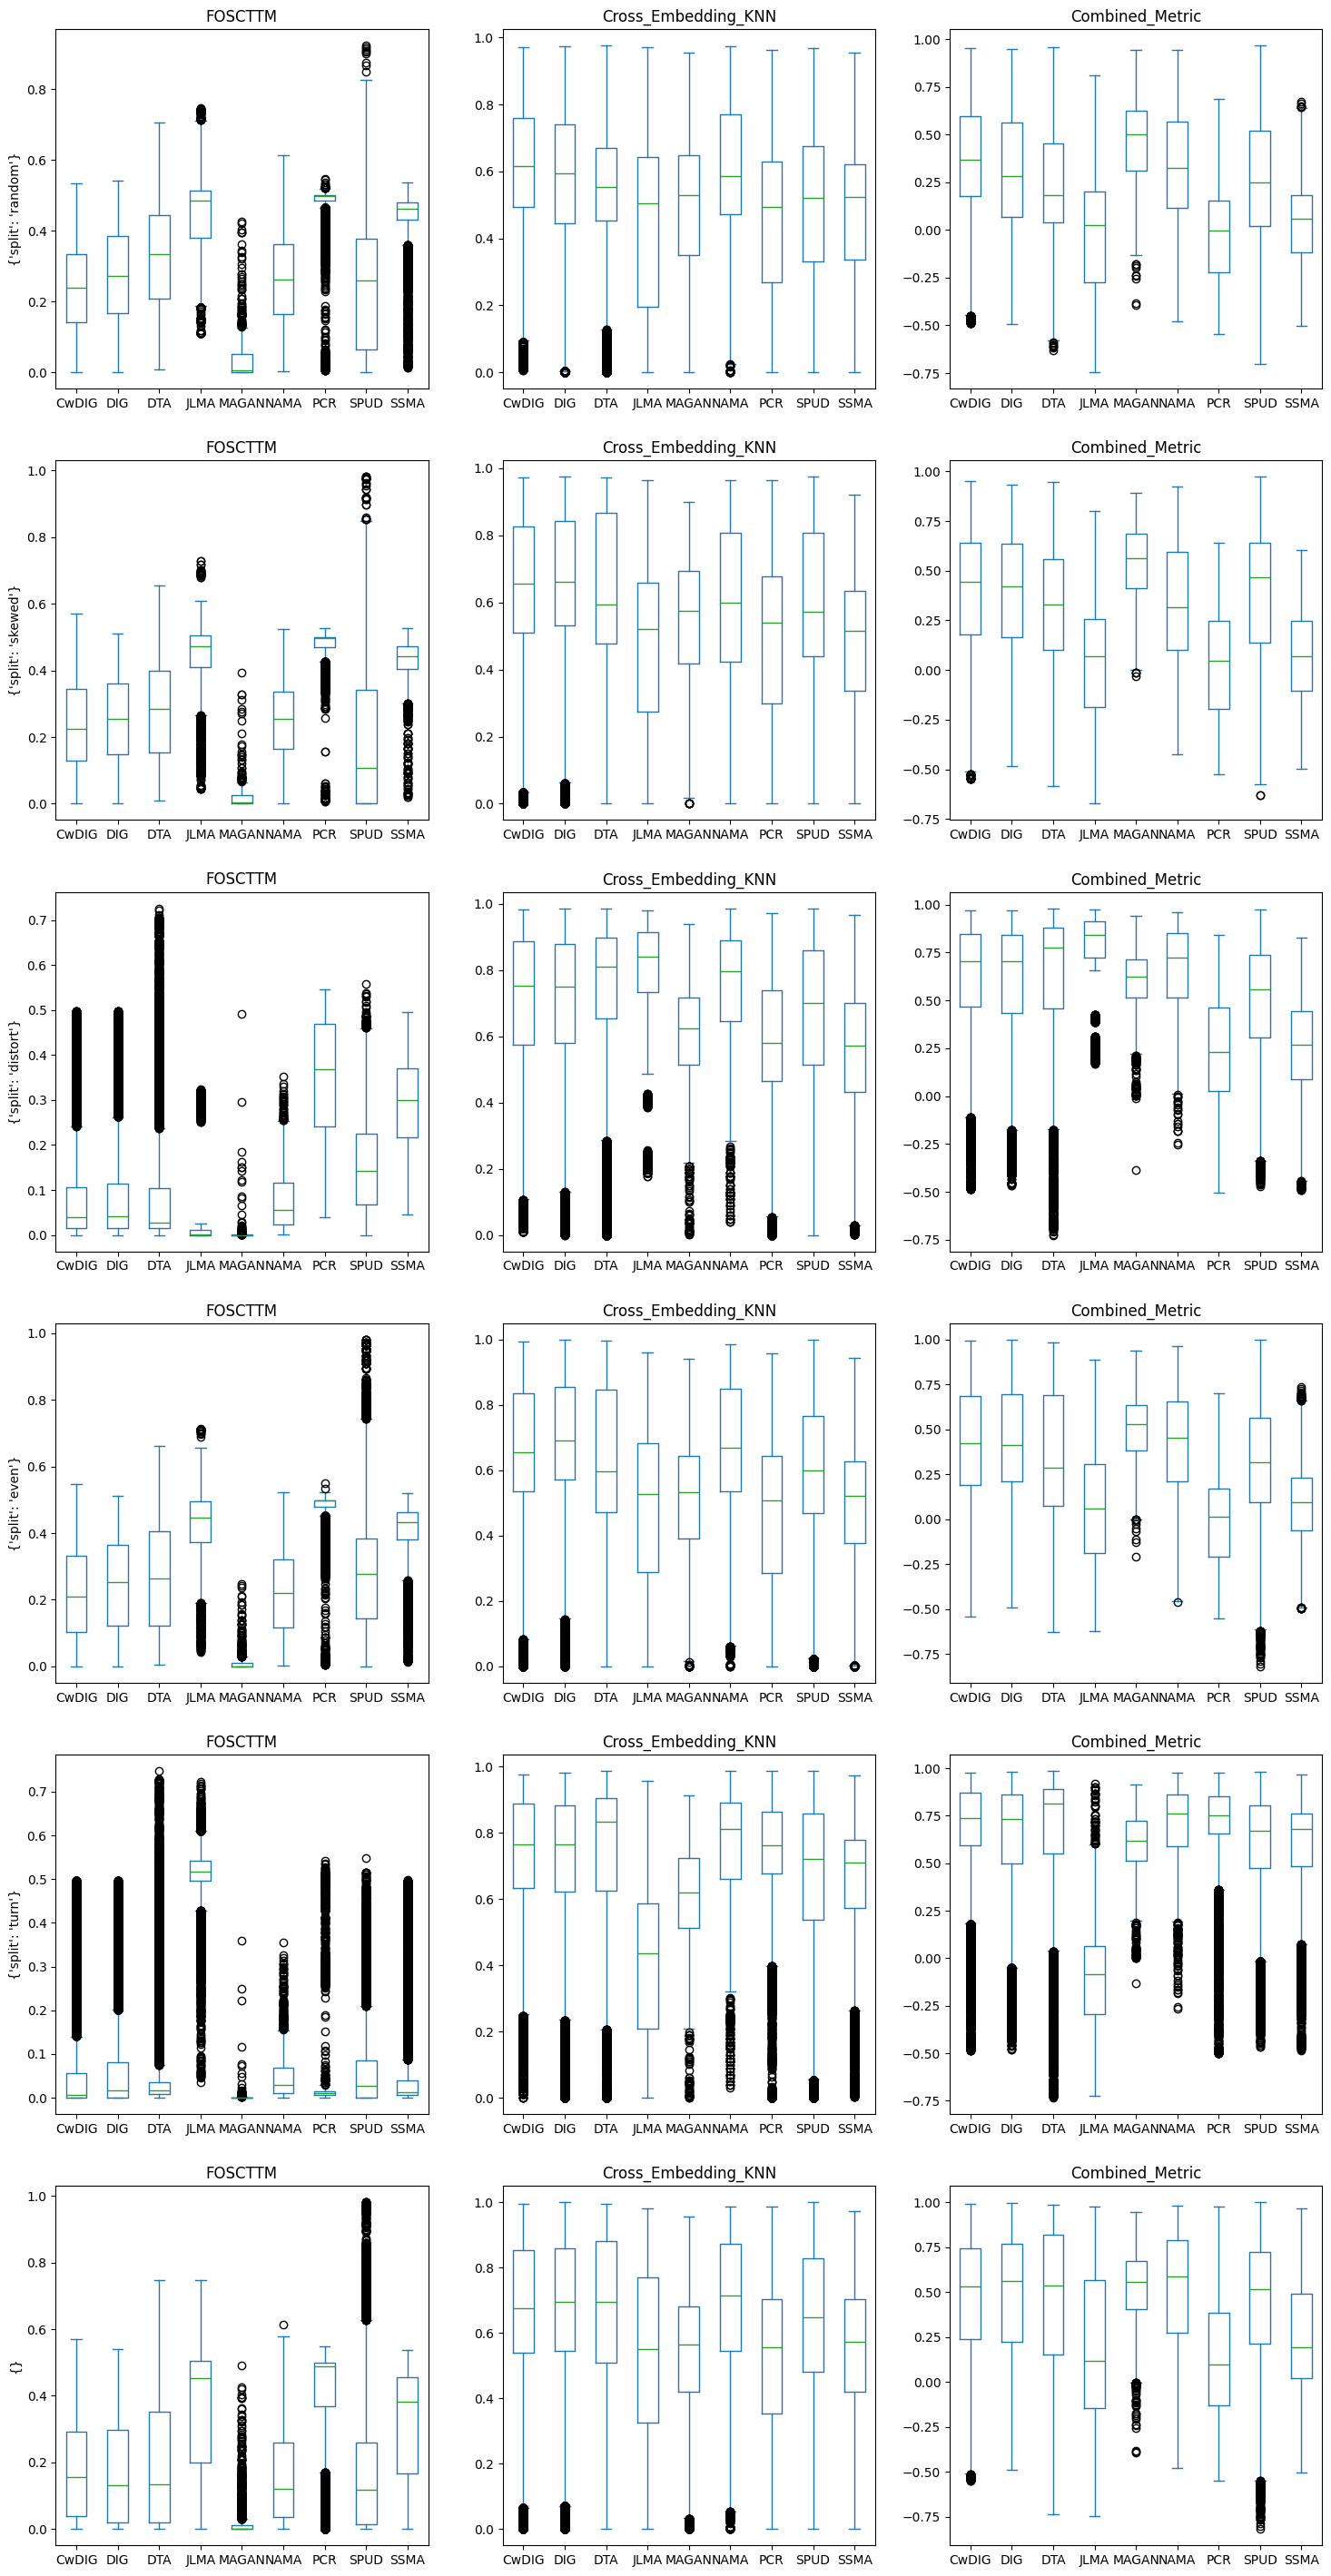

In [3]:
columns = [{"column": 'FOSCTTM'}, {"column": 'Cross_Embedding_KNN'}, {"column": 'Combined_Metric'}]
rows = [{"split" : "random" #, "csv_file" : "iris"
         }, 
        {"split" : "skewed" #, "csv_file" : "iris"
         }, 
        {"split" : "distort" #, "csv_file" : "iris"
         },
        {"split" : "even" #, "csv_file" : "iris"
         },
         {"split" : "turn" #, "csv_file" : "iris"
         },
         {}]

plot_in_fig(df = df, columns = columns, rows = rows, by='method', kind = 'box')

## Comparing Arguments within the same Methods

### DIG

We See that Page Rank has little effect on the overall graph data

In [5]:
#If we want to see only a few csv files at a time, we can sub set it here
#df_subset2 = df[df["csv_file"] == "glass"]

#To see all of it combined
df_subset2 = df

#Change the method to DIG
df_subset2 = df_subset2[df_subset2["method"] == "DIG"]

In [6]:
df_subset2.sample(5)

,csv_file,method,seed,split,KNN,Percent_of_KNN,Percent_of_Anchors,Page_Rank,Predicted_Feature_MAE,Operation,SPUDS_Algorithm,FOSCTTM,Cross_Embedding_KNN,A_Classification_Score,B_Classification_Score,Combined_Metric
613501,crx,DIG,1825,even,86,0.13,0.2,None,0.274999,NaN,NaN,0.340316,0.631024,0.471386,0.524096,0.290708
520049,hepatitis,DIG,2969,skewed,20,0.13,0.05,None,0.293839,NaN,NaN,0.403775,0.485507,0.557971,0.536232,0.081732
870934,iris,DIG,6639,turn,30,0.15,0.2,off-diagonal,0.354122,NaN,NaN,0.047156,0.900000,0.953333,0.953333,0.852844
252008,heart_failure,DIG,9515,even,2,0.01,0.05,None,NaN,NaN,NaN,0.456086,0.662207,0.618729,0.682274,0.206122
73568,chess,DIG,1825,random,322,0.11,0.3,off-diagonal,0.347639,NaN,NaN,0.335251,0.545682,NaN,NaN,0.210432


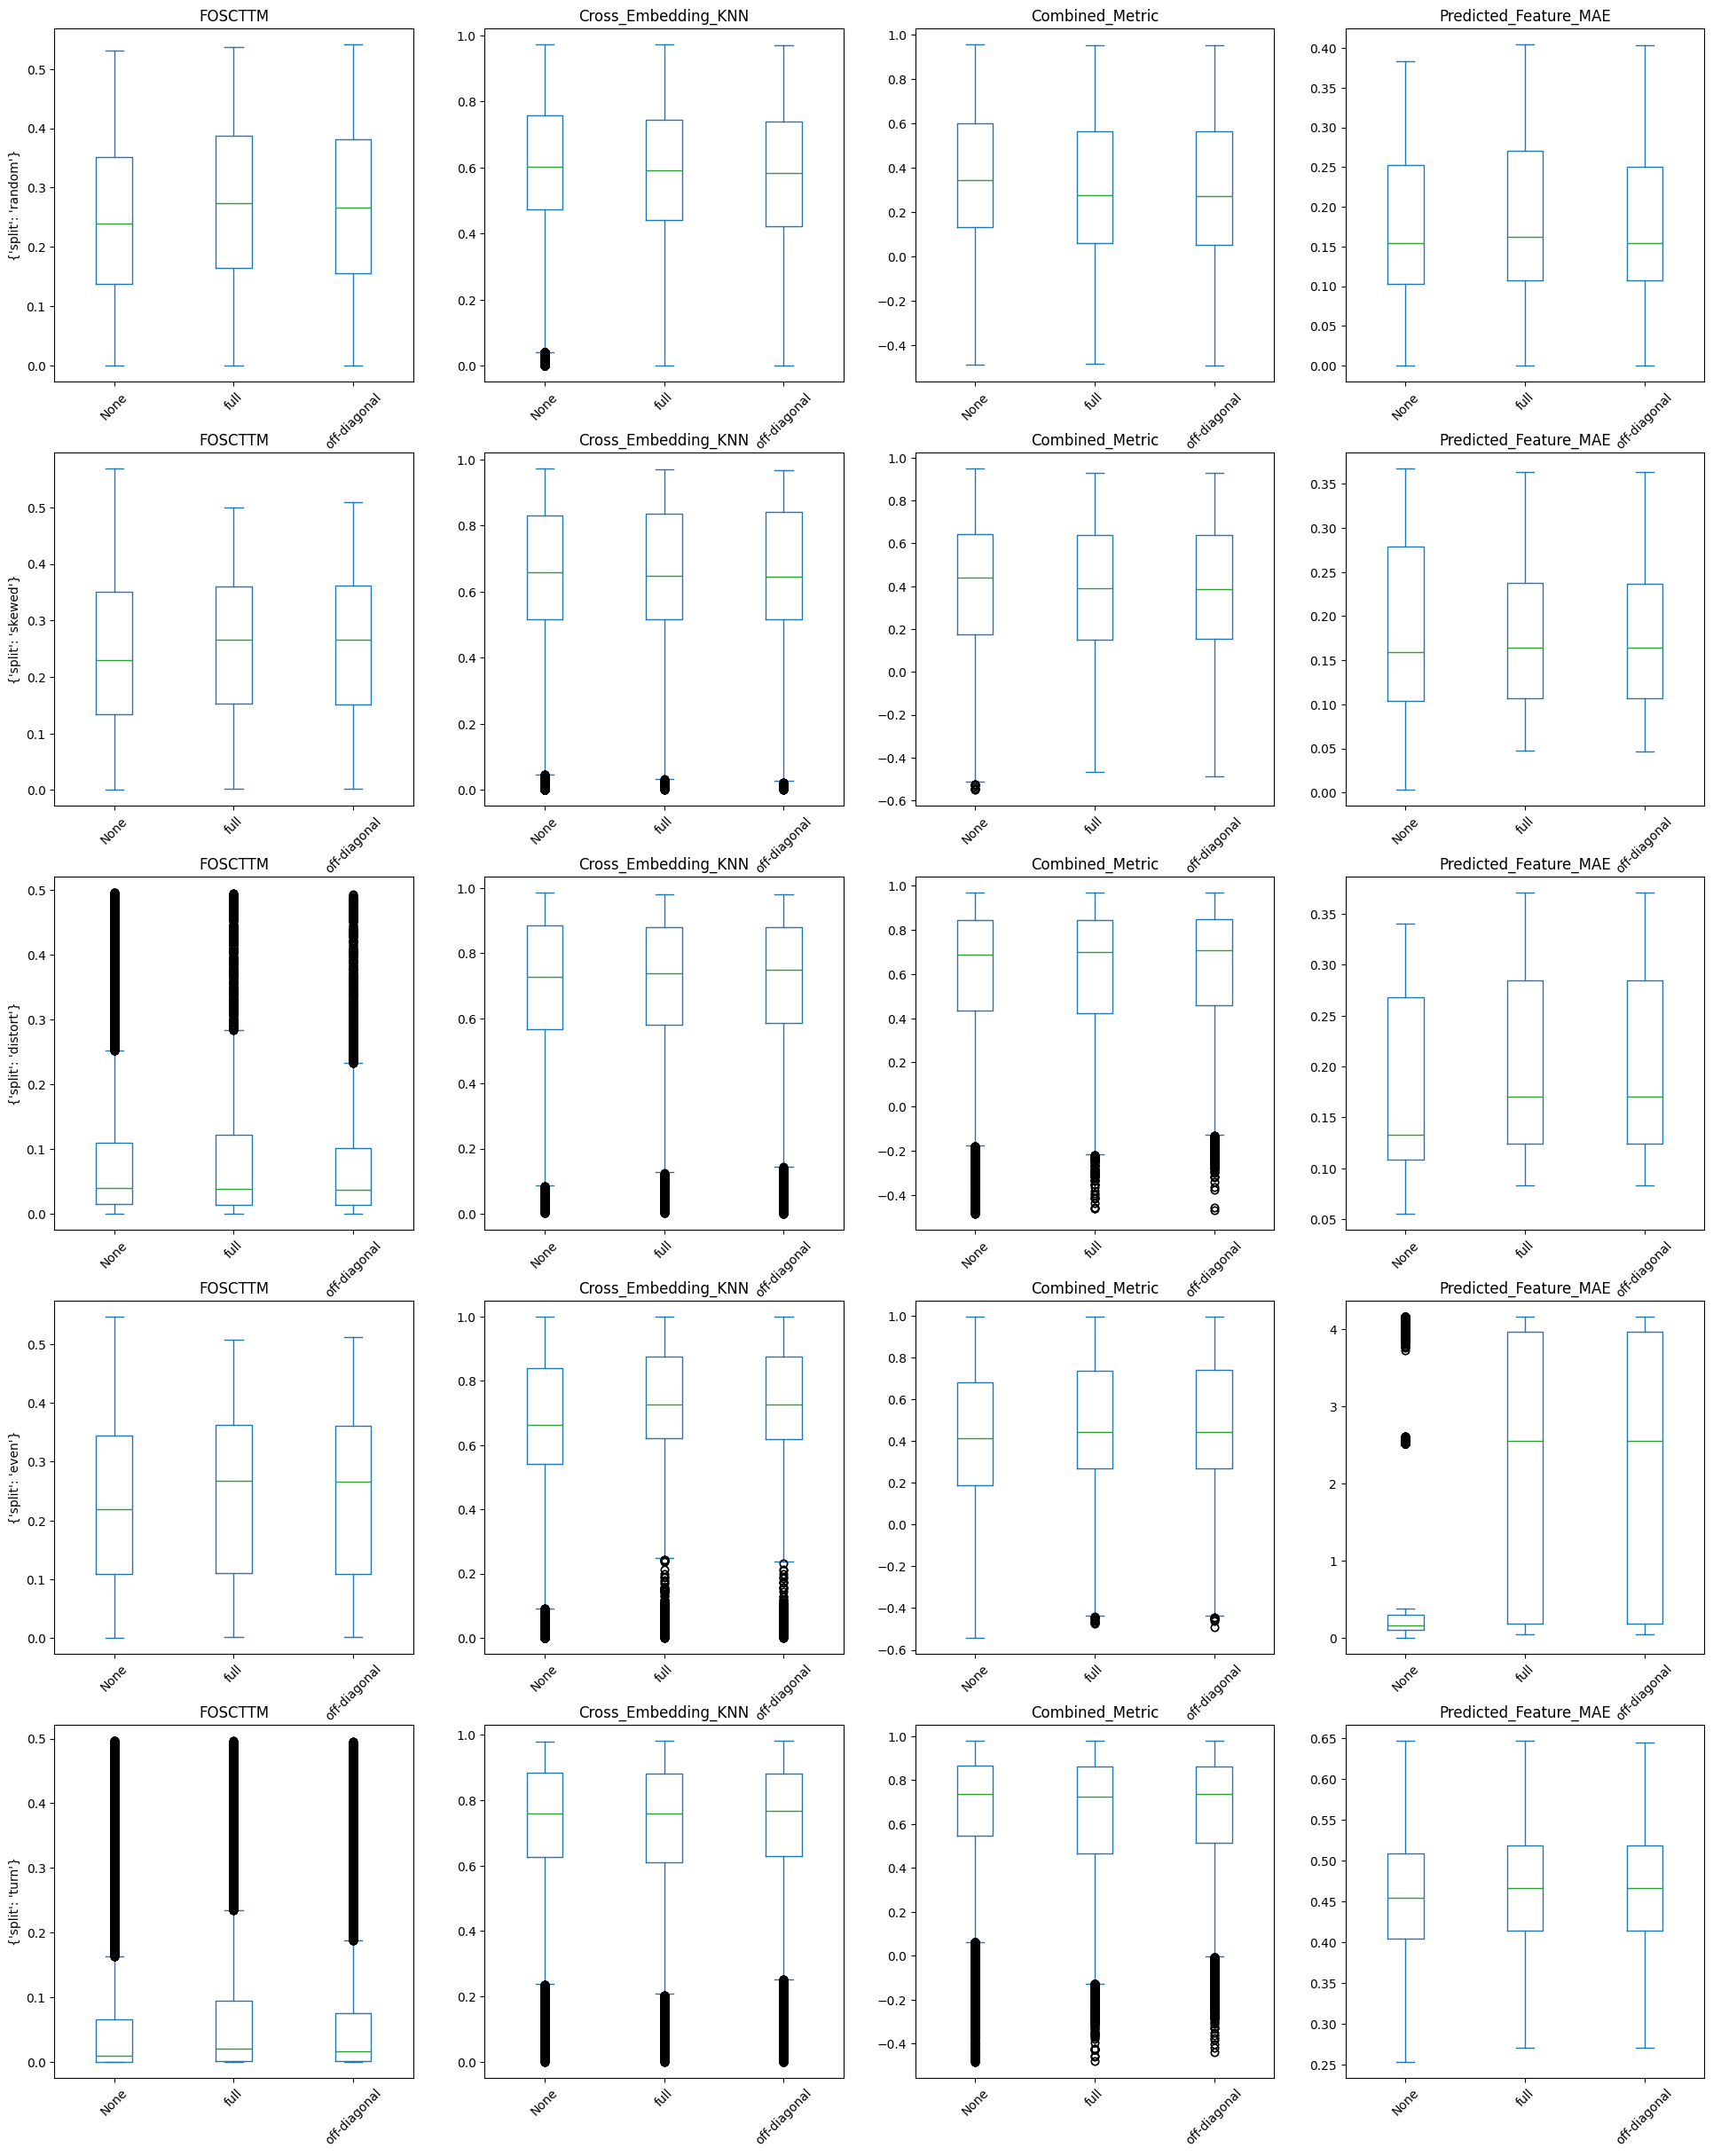

In [7]:

columns = [{"column": 'FOSCTTM'}, {"column": 'Cross_Embedding_KNN'}, {"column": 'Combined_Metric'}, {"column": "Predicted_Feature_MAE"}]
rows = [{"split" : "random" #, "csv_file" : "iris"
         }, 
        {"split" : "skewed" #, "csv_file" : "iris"
         }, 
        {"split" : "distort" #, "csv_file" : "iris"
         },
        {"split" : "even" #, "csv_file" : "iris"
         },
         {"split" : "turn" #, "csv_file" : "iris"
         }]

plot_in_fig(columns = columns, rows = rows, by='Page_Rank', kind = 'box',  rot = 45)

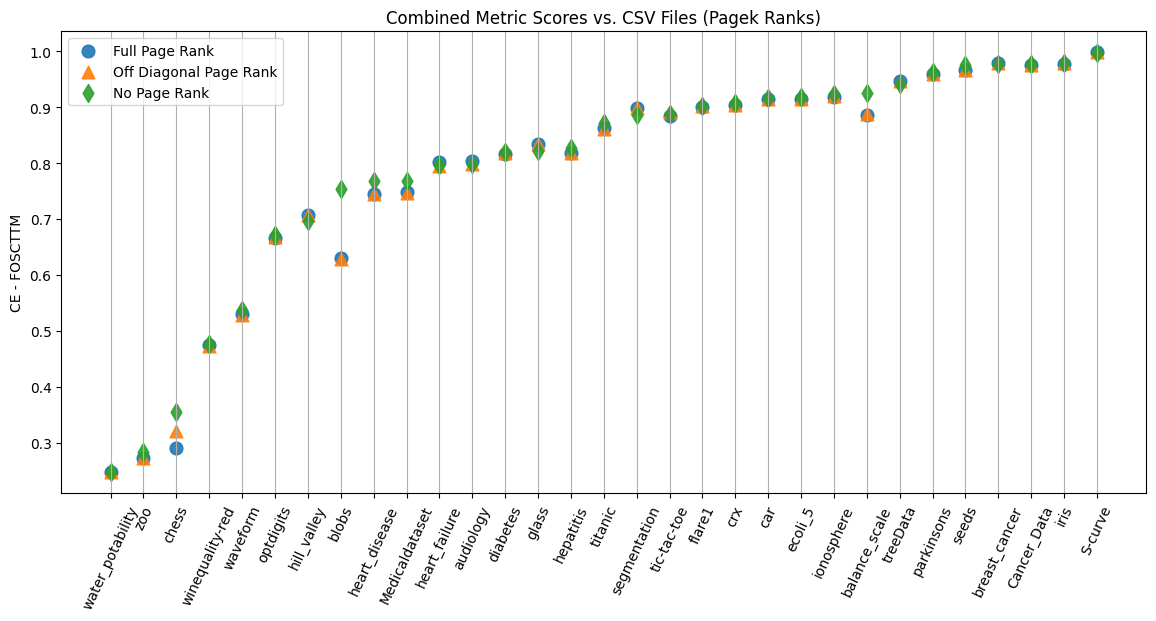

In [8]:
#Create an aggregate DF 
agregate_df = pd.DataFrame({
    'Full_Page_Rank': df[df["Page_Rank"] == "off-diagonal"].groupby("csv_file")["Combined_Metric"].max(),
    'Off-Diagonal_Page_Rank': df[df["Page_Rank"] == "full"].groupby("csv_file")["Combined_Metric"].max(),
    'No_Page_Rank': df[df["Page_Rank"] == "None"].groupby("csv_file")["Combined_Metric"].max()
})


agregate_df = agregate_df.sort_values(by = "No_Page_Rank").reset_index()

#To make it easier to add edits
key_words = {"x" : agregate_df.index,
            "s" : 84,
            "alpha" : .90}

plt.figure(figsize=(14, 6))
ax = plt.scatter(y = agregate_df["Full_Page_Rank"], label = "Full Page Rank", **key_words) #I'm back and forth on the helpfulness of the markers
ax = plt.scatter(y = agregate_df["Off-Diagonal_Page_Rank"], marker = '^', label = "Off Diagonal Page Rank", **key_words)
ax = plt.scatter(y = agregate_df["No_Page_Rank"], marker = 'd', label = "No Page Rank", **key_words)


#Show Legend
plt.xticks(ticks= agregate_df.index,labels=agregate_df["csv_file"], rotation = 65)
plt.title(f"Combined Metric Scores vs. CSV Files (Pagek Ranks)")
plt.ylabel("CE - FOSCTTM")
plt.grid(visible=True, axis = "x")
plt.legend()
plt.show()

In [9]:
subset_df(df, method = "CwDIG")[10:20]

,csv_file,method,seed,split,KNN,Percent_of_KNN,Percent_of_Anchors,Page_Rank,Predicted_Feature_MAE,Operation,SPUDS_Algorithm,FOSCTTM,Cross_Embedding_KNN,A_Classification_Score,B_Classification_Score,Combined_Metric
151,heart_disease,CwDIG,2969,skewed,8,0.03,0.15,None,0.285098,0.2,NaN,0.345084,0.545455,0.552189,0.572391,0.200371
152,heart_disease,CwDIG,2969,skewed,8,0.03,0.5,None,0.285899,0.2,NaN,0.165289,0.552189,0.552189,0.572391,0.386899
153,heart_disease,CwDIG,2969,skewed,14,0.05,0.05,None,0.282736,0.2,NaN,0.394126,0.508418,0.579125,0.555556,0.114291
154,heart_disease,CwDIG,2969,skewed,14,0.05,0.1,None,0.284001,0.2,NaN,0.394603,0.518519,0.579125,0.555556,0.123916
155,heart_disease,CwDIG,2969,skewed,14,0.05,0.3,None,0.284350,0.2,NaN,0.261799,0.501684,0.579125,0.555556,0.239885
156,heart_disease,CwDIG,2969,skewed,14,0.05,0.2,None,0.287206,0.2,NaN,0.302792,0.562290,0.579125,0.555556,0.259497
157,heart_disease,CwDIG,2969,skewed,14,0.05,0.15,None,0.289690,0.2,NaN,0.372847,0.535354,0.579125,0.555556,0.162506
158,heart_disease,CwDIG,2969,skewed,14,0.05,0.5,None,0.287027,0.2,NaN,0.191143,0.562290,0.579125,0.555556,0.371147
159,heart_disease,CwDIG,2969,skewed,20,0.07,0.05,None,0.284657,0.2,NaN,0.405531,0.498316,0.558923,0.538721,0.092785
160,heart_disease,CwDIG,2969,skewed,20,0.07,0.1,None,0.285391,0.2,NaN,0.401314,0.555556,0.558923,0.538721,0.154242


### SPUD

Notes:
1. Distance + Avg seems to be the best metric most of the time, although they seem pretty similar

In [10]:
subset_df(df, Operation = "abs")

,csv_file,method,seed,split,KNN,Percent_of_KNN,Percent_of_Anchors,Page_Rank,Predicted_Feature_MAE,Operation,SPUDS_Algorithm,FOSCTTM,Cross_Embedding_KNN,A_Classification_Score,B_Classification_Score,Combined_Metric
683,heart_disease,SPUD,5198,random,2,0.01,0.05,NaN,NaN,abs,pure,0.468875,0.461279,0.491582,0.545455,-0.007596
684,heart_disease,SPUD,5198,random,2,0.01,0.1,NaN,NaN,abs,pure,0.434593,0.491582,0.491582,0.545455,0.056990
685,heart_disease,SPUD,5198,random,2,0.01,0.3,NaN,NaN,abs,pure,0.327982,0.484848,0.491582,0.545455,0.156866
686,heart_disease,SPUD,5198,random,2,0.01,0.2,NaN,NaN,abs,pure,0.375665,0.471380,0.491582,0.545455,0.095716
687,heart_disease,SPUD,5198,random,2,0.01,0.15,NaN,NaN,abs,pure,0.408076,0.488215,0.491582,0.545455,0.080139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073633,S-curve,SPUD,6517,even,27,0.11,0.5,NaN,NaN,abs,pure,0.176125,0.390000,NaN,NaN,0.213875
1073634,S-curve,SPUD,6517,even,32,0.13,0.5,NaN,NaN,abs,pure,0.162625,0.650000,NaN,NaN,0.487375
1073635,S-curve,SPUD,6517,even,37,0.15,0.5,NaN,NaN,abs,pure,0.154225,0.515000,NaN,NaN,0.360775
1073636,S-curve,SPUD,6517,even,42,0.17,0.5,NaN,NaN,abs,pure,0.187225,0.295000,NaN,NaN,0.107775


/tmp/ipykernel_2219451/1399079137.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub["Combined_Arguments"] = df_sub["Operation"]+ " and " + df_sub["SPUDS_Algorithm"]


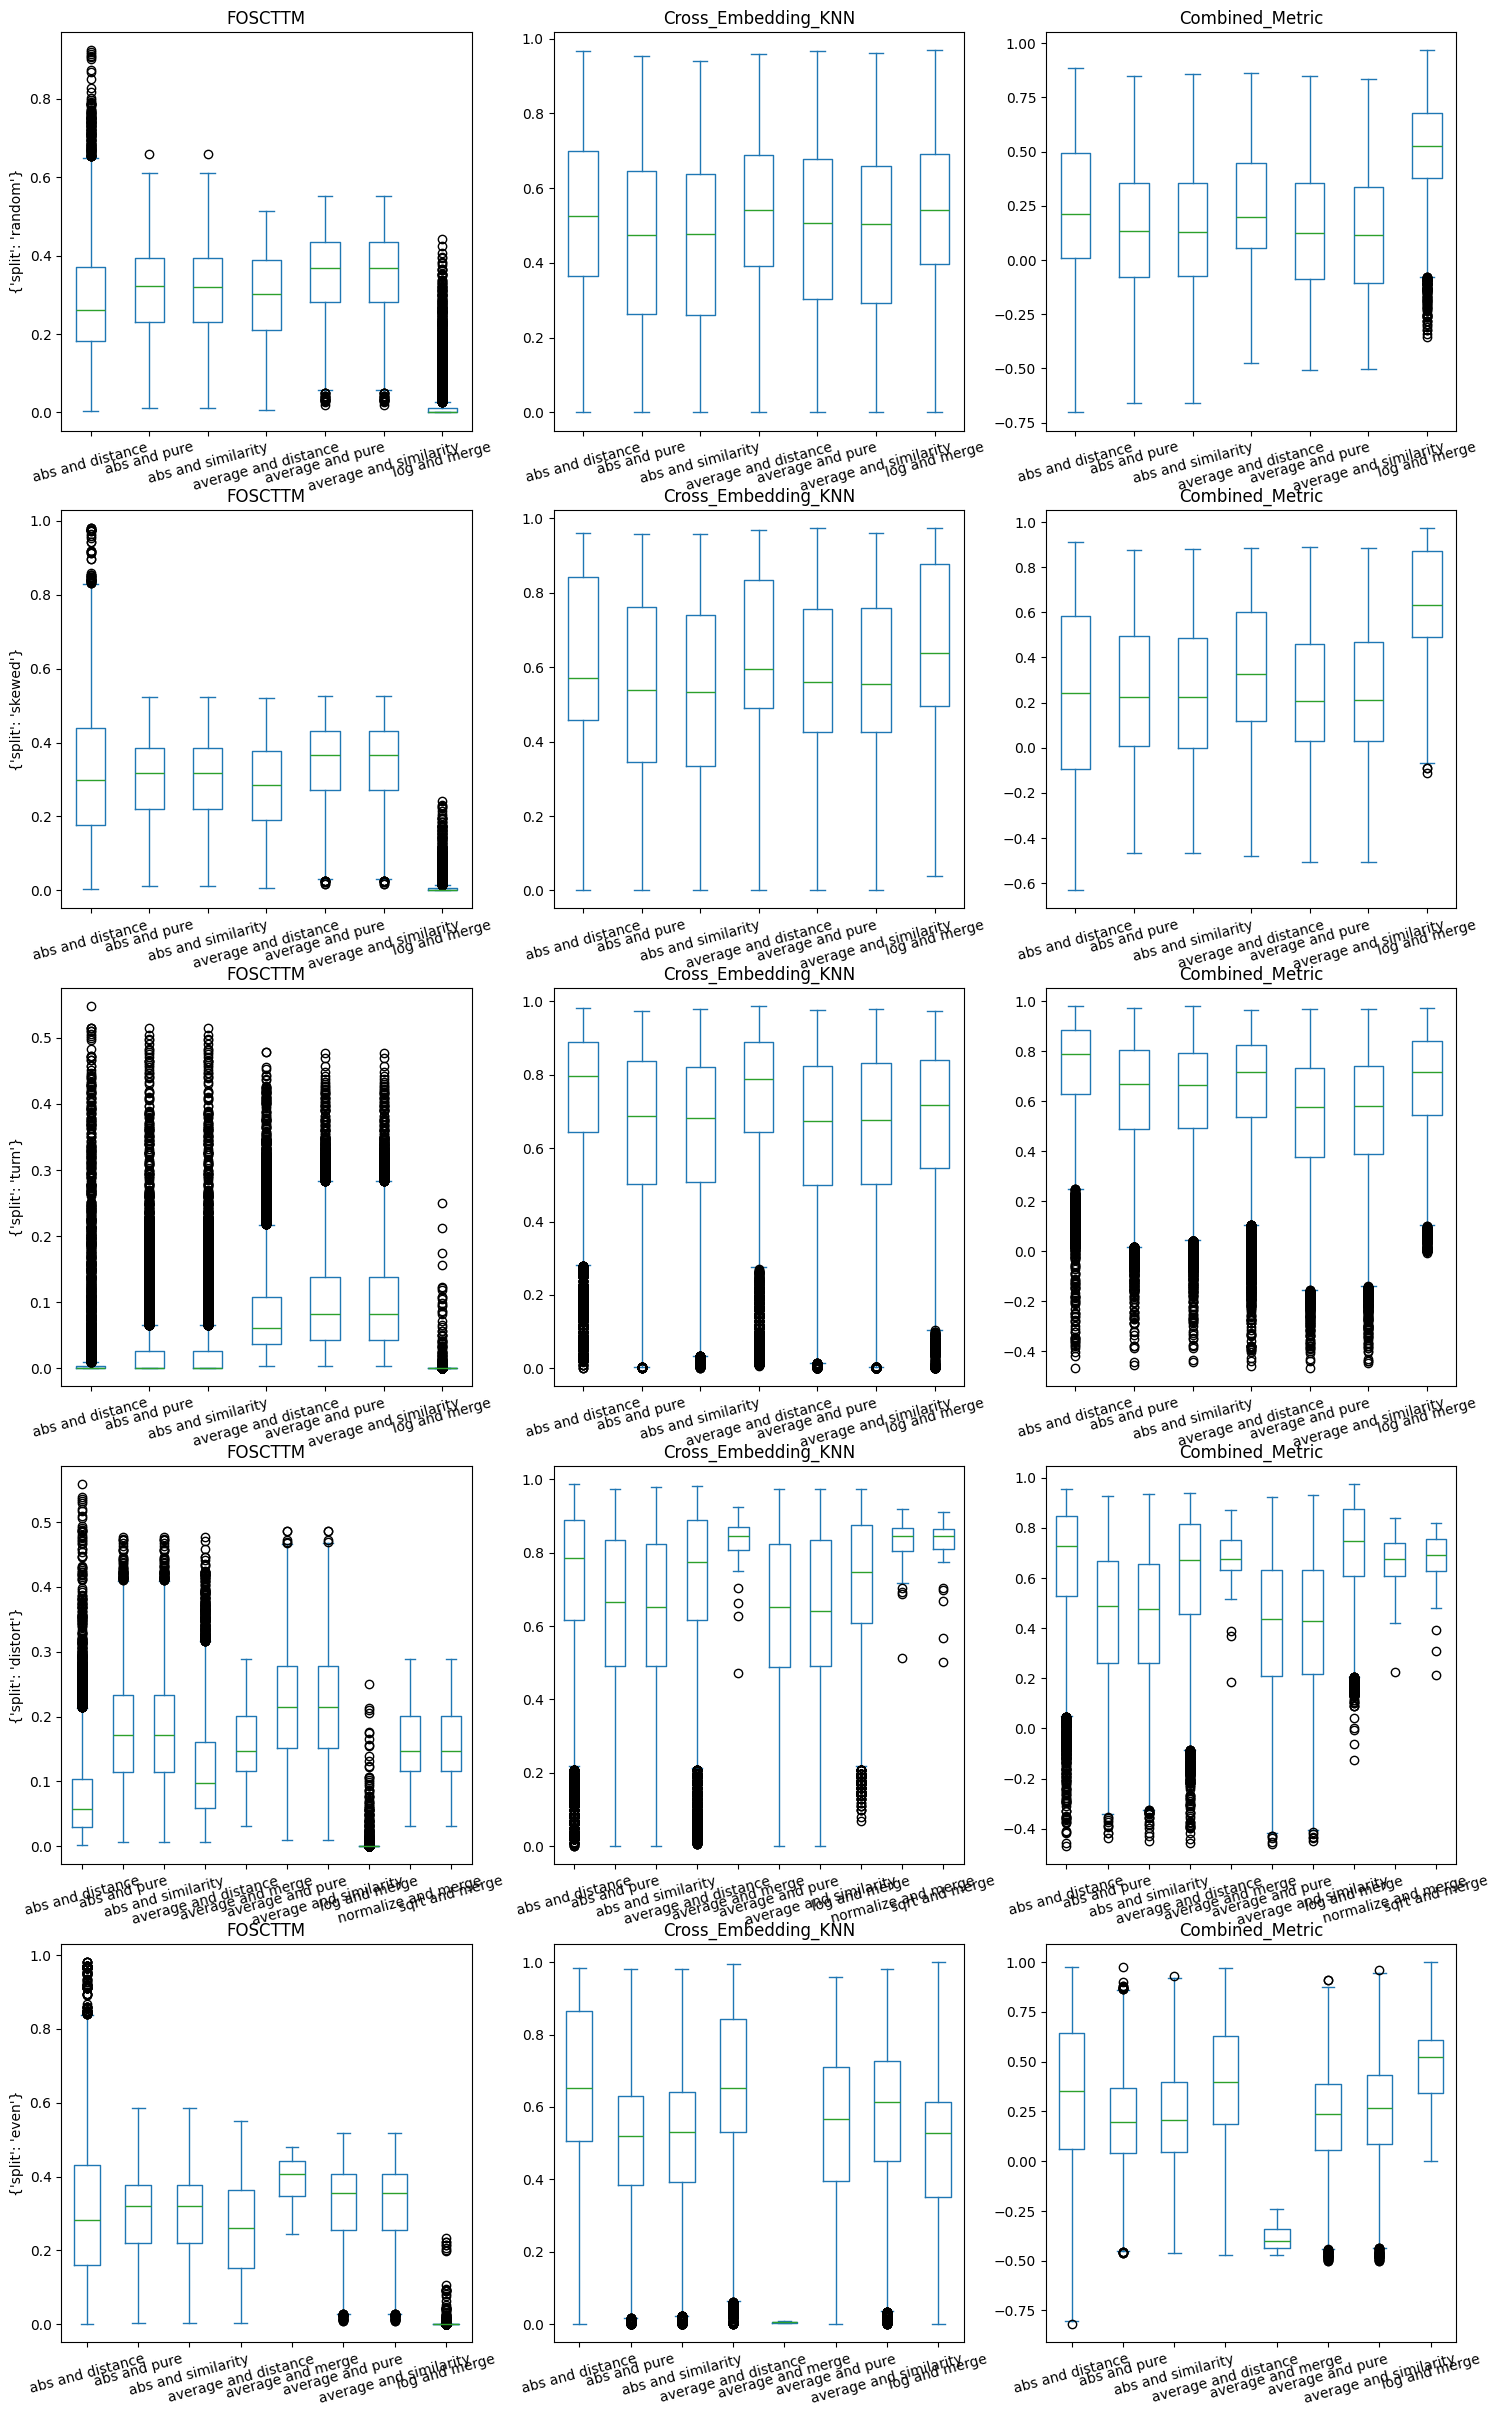

In [11]:
#To make it easier to add edits
key_words = {"figsize": (10, 6),
            "kind": "box",
            "by": "Combined_Arguments",
            "rot": 15}

#Combine SPUD argumenst
df_sub = subset_df(df, method = "SPUD")
df_sub["Combined_Arguments"] = df_sub["Operation"]+ " and " + df_sub["SPUDS_Algorithm"]

columns = [{"column": 'FOSCTTM'}, {"column": 'Cross_Embedding_KNN'}, {"column": 'Combined_Metric'}]
rows = [{"split" : "random" #, "csv_file" : "iris"
         }, 
        {"split" : "skewed"#, "csv_file" : "iris"
         }, 
        {"split" : "turn"#, "csv_file" : "iris"
         },
         {"split" : "distort" #, "csv_file" : "iris"
         }, 
        {"split" : "even"#, "csv_file" : "iris"
         }]

plot_in_fig(df = df_sub, columns = columns, rows = rows, **key_words)

## Comparing Methods against CSV Files

DTA seems to be the best on split methods that are made arbitrarily, like the "turn" and the "distort", where as DIG and SPUD preform the best when the data is split "random" or skewed

In [7]:
def plt_methods_by_CSV_max(df = df, sort_by = "DIG", metric = "Combined_Metric", return_df =False, plot_methods = ["SSMA", "MAGAN", "DTA", "SPUD_D", "SPUD_M", "DIG", "CwDIG", "NAMA", "PCR", "JLMA", "Split_A", "Split_B"]):
    """df should equal the dataframe. It can be subsetted already
    
    Plots the max of the combined metric for each method to each CSV_File
    
    sort_by should be the string of what the method you want"""

    if metric == "FOSCTTM": #Because for the FOSCTTM the smaller score is better
        agregate_df = pd.DataFrame({
            'SSMA': df[df["method"] == "SSMA"].groupby("csv_file")[metric].min(),
            'MAGAN': df[df["method"] == "MAGAN"].groupby("csv_file")[metric].min(),
            'DTA': df[df["method"] == "DTA"].groupby("csv_file")[metric].min(),
            'SPUD_D': df[df["SPUDS_Algorithm"]== "distance"].groupby("csv_file")[metric].min(),
            'SPUD': df[df["SPUDS_Algorithm"] == "merge"].groupby("csv_file")[metric].min(),
            'DIG': df[df["method"] == "DIG"].groupby("csv_file")[metric].min(),
            'CwDIG': df[df["method"] == "CwDIG"].groupby("csv_file")[metric].min(),
            'NAMA': df[df["method"] == "NAMA"].groupby("csv_file")[metric].min(),
            'PCR': df[df["method"] == "PCR"].groupby("csv_file")[metric].min(),
            'JLMA': df[df["method"] == "JLMA"].groupby("csv_file")[metric].min(),
            'Split_A': df.groupby("csv_file")["A_Classification_Score"].min(),
            'Split_B': df.groupby("csv_file")["B_Classification_Score"].min()
        })
    else:
        agregate_df = pd.DataFrame({
            'SSMA': df[df["method"] == "SSMA"].groupby("csv_file")[metric].max(),
            'MAGAN': df[df["method"] == "MAGAN"].groupby("csv_file")[metric].max(),
            'DTA': df[df["method"] == "DTA"].groupby("csv_file")[metric].max(),
            'SPUD_D': df[df["SPUDS_Algorithm"]== "distance"].groupby("csv_file")[metric].max(),
            'SPUD': df[df["SPUDS_Algorithm"] == "merge"].groupby("csv_file")[metric].max(),
            'DIG': df[df["method"] == "DIG"].groupby("csv_file")[metric].max(),
            'CwDIG': df[df["method"] == "CwDIG"].groupby("csv_file")[metric].max(),
            'NAMA': df[df["method"] == "NAMA"].groupby("csv_file")[metric].max(),
            'PCR': df[df["method"] == "PCR"].groupby("csv_file")[metric].max(),
            'JLMA': df[df["method"] == "JLMA"].groupby("csv_file")[metric].max(),
            'Split_A': df.groupby("csv_file")["A_Classification_Score"].max(),
            'Split_B': df.groupby("csv_file")["B_Classification_Score"].max()
        })

    agregate_df = agregate_df.sort_values(by = sort_by).reset_index()

    #If we only want the df
    if return_df:
        return agregate_df

    #To make it easier to add edits
    key_words = {"x" : agregate_df.index - 0.1,
                "s" : 50,
                "alpha" : .90,
                #"edgecolor" : "black",
                #"linewidth": 0.5,
                #"facecolor": "None"
                }

    plt.figure(figsize=(16, 6))
    
    if "DIG" in plot_methods:
        ax = plt.scatter(y = agregate_df["DIG"], marker = '^', label = "MASH", **key_words)
    if "MAGAN" in plot_methods:
        ax = plt.scatter(y = agregate_df["MAGAN"], marker = 'h', label = "MAGAN", **key_words)
    if "JLMA" in plot_methods:
        ax = plt.scatter(y = agregate_df["JLMA"], marker = '_', label = "JLMA", **key_words)
    if "SPUD_D" in plot_methods:
        ax = plt.scatter(y = agregate_df["SPUD_D"], label = "SPUD_D", **key_words)
    if "Split_A" in plot_methods:
        ax = plt.scatter(y = agregate_df["Split_A"], marker = '.', label = "Split A", **key_words)

    #To make it easier to add edits
    key_words = {"x" : agregate_df.index + 0.1,
                "s" : 50,
                "alpha" : .90,
                #"edgecolor" : "black",
                #"linewidth": 0.5,
                #"facecolor": "None"
                }
    if "CwDIG" in plot_methods:
        ax = plt.scatter(y = agregate_df["CwDIG"], marker = '^', label = "MASH-", **key_words)
    if "NAMA" in plot_methods:
        ax = plt.scatter(y = agregate_df["NAMA"], marker = '*', label = "NAMA", **key_words)
    if "PCR" in plot_methods:
        ax = plt.scatter(y = agregate_df["PCR"], marker = 'v', label = "Procrutees", **key_words)
    if "DTA" in plot_methods:
        ax = plt.scatter(y = agregate_df["DTA"], marker = "d", label = "DTA", **key_words)
    if "SPUD" in plot_methods:
        ax = plt.scatter(y = agregate_df["SPUD"], label = "SPUD", **key_words)
    if "SSMA" in plot_methods:
        ax = plt.scatter(y = agregate_df["SSMA"],  marker = 's', label = "SSMA", **key_words) 
    if "Split_B" in plot_methods:
        ax = plt.scatter(y = agregate_df["Split_B"], marker = '.', label = "Split B", **key_words)


    #Show Legend
    plt.xticks(ticks= agregate_df.index,labels=agregate_df["csv_file"], rotation = 90)
    plt.title(f"{metric} Scores vs. CSV Files (MAX)")
    plt.ylabel(metric)
    plt.grid(visible=True, axis = "x")
    plt.legend()
    plt.show()

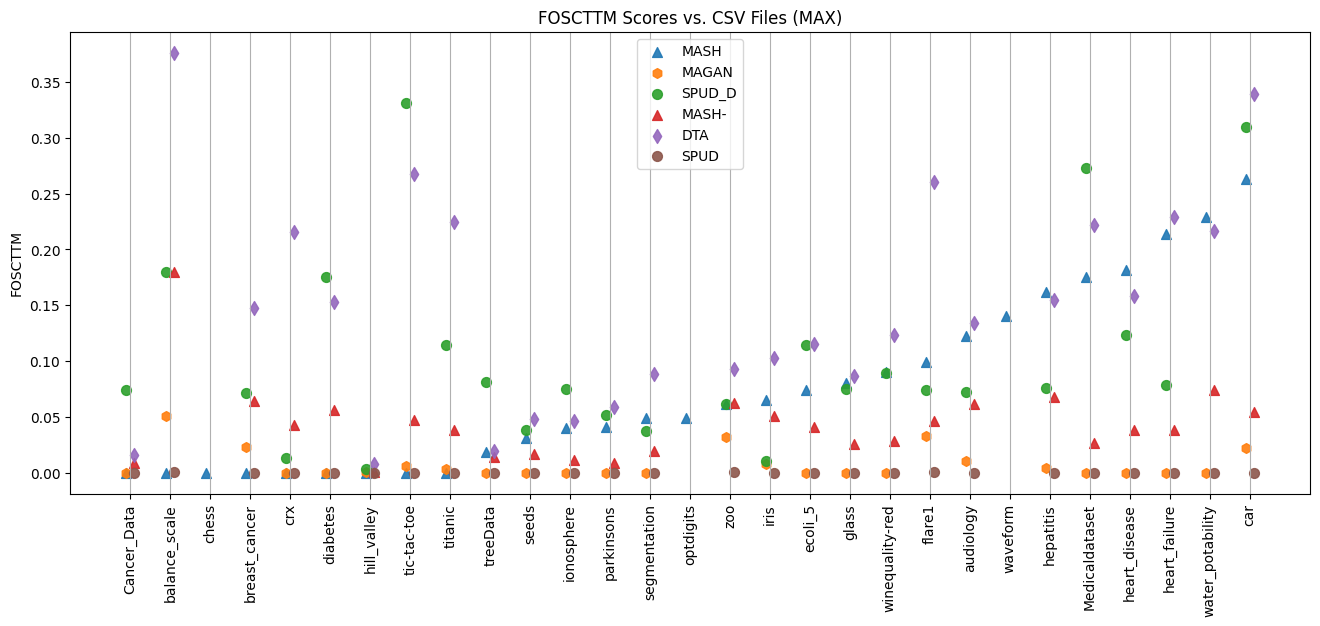

In [8]:
#plt_methods_by_CSV_max(df = df, sort_by = "DIG") #This shows all of the data gather
plt_methods_by_CSV_max(df = subset_df(df, split = "random"), metric = "FOSCTTM", plot_methods = ["MAGAN", "DTA", "DIG", "SPUD_D", "SPUD", "CwDIG"])

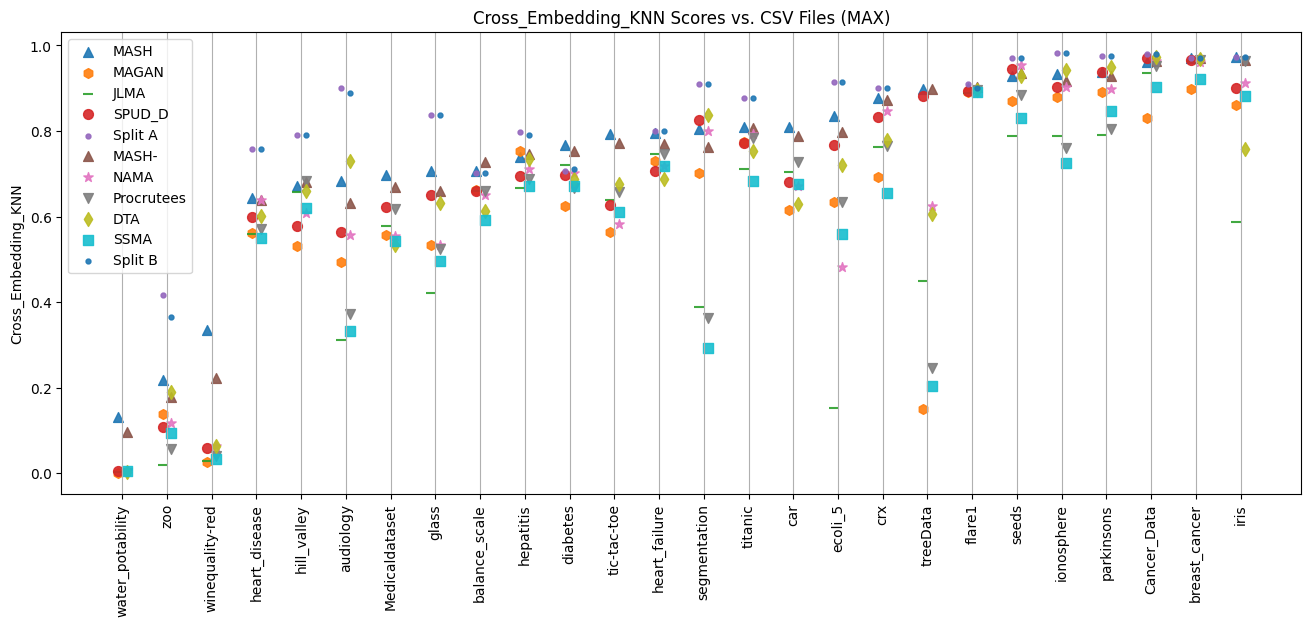

In [45]:
plt_methods_by_CSV_max(df = subset_df(df, split = "skewed"), metric = "Cross_Embedding_KNN", sort_by="DIG")

In [46]:
def plt_methods_by_CSV_mean(df = df, sort_by = "SPUD", metric = "Combined_Metric", return_df = False):
    """Plots 95 percent confident intervals for each method against csv files
    
    sort_by should be the string of what the method you want"""

    agregate_df = pd.DataFrame({
        'SSMA': df[df["method"] == "SSMA"].groupby("csv_file")[metric].mean(),
        'MAGAN': df[df["method"] == "MAGAN"].groupby("csv_file")[metric].mean(),
        'DTA': df[df["method"] == "DTA"].groupby("csv_file")[metric].mean(),
        'SPUD': df[df["method"] == "SPUD"].groupby("csv_file")[metric].mean(),
        'DIG': df[df["method"] == "DIG"].groupby("csv_file")[metric].mean(),
        'CwDIG': df[df["method"] == "CwDIG"].groupby("csv_file")[metric].mean(),
        'NAMA': df[df["method"] == "NAMA"].groupby("csv_file")[metric].mean(),
        'JLMA': df[df["method"] == "JLMA"].groupby("csv_file")[metric].mean(),
        'PCR': df[df["method"] == "PCR"].groupby("csv_file")[metric].mean(),
        'Split_A': df.groupby("csv_file")["A_Classification_Score"].mean(),
        'Split_B': df.groupby("csv_file")["B_Classification_Score"].mean()
    })

    #Calculate error bars
    err_df = pd.DataFrame({
        'SSMA': df[df["method"] == "SSMA"].groupby("csv_file")[metric].std(),
        'MAGAN': df[df["method"] == "MAGAN"].groupby("csv_file")[metric].std(),
        'DTA': df[df["method"] == "DTA"].groupby("csv_file")[metric].std(),
        'SPUD': df[df["method"] == "SPUD"].groupby("csv_file")[metric].std(),
        'DIG': df[df["method"] == "DIG"].groupby("csv_file")[metric].std(),
        'CwDIG': df[df["method"] == "CwDIG"].groupby("csv_file")[metric].std(),
        'NAMA': df[df["method"] == "NAMA"].groupby("csv_file")[metric].std(),
        'JLMA': df[df["method"] == "JLMA"].groupby("csv_file")[metric].std(),
        'PCR': df[df["method"] == "PCR"].groupby("csv_file")[metric].std(),
        'Split_A': df.groupby("csv_file")["A_Classification_Score"].std(),
        'Split_B': df.groupby("csv_file")["B_Classification_Score"].std()
    })

    agregate_df = agregate_df.sort_values(by = sort_by).reset_index()

    #If we only want the df
    if return_df:
        return agregate_df

    #To make it easier to add edits
    key_words = {"ms" : 8,
                "alpha" : .75}

    plt.figure(figsize=(20, 6))
    ax = plt.errorbar(x = agregate_df.index - 0.1, y = agregate_df["DTA"], yerr = err_df["DTA"], fmt = ".", label = "DTA", **key_words)
    ax = plt.errorbar(x = agregate_df.index, y = agregate_df["SPUD"], yerr = err_df["SPUD"], fmt = ".", label = "SPUD", **key_words) 
    ax = plt.errorbar(x = agregate_df.index + 0.2, y = agregate_df["DIG"], yerr = err_df["DIG"],fmt = '.', label = "DIG", **key_words)
    ax = plt.errorbar(x = agregate_df.index + 0.2, y = agregate_df["CwDIG"], yerr = err_df["CwDIG"],fmt = '.', label = "CwDIG", **key_words)
    ax = plt.errorbar(x = agregate_df.index + 0.1, y = agregate_df["SSMA"], yerr = err_df["SSMA"],fmt = '.', label = "SSMA", **key_words)
    ax = plt.errorbar(x = agregate_df.index - 0.2, y = agregate_df["NAMA"], yerr = err_df["NAMA"],fmt = '.', label = "NAMA", **key_words)
    ax = plt.errorbar(x = agregate_df.index + 0.3, y = agregate_df["MAGAN"], yerr = err_df["MAGAN"],fmt = '.', color = "black", label = "MAGAN", **key_words)
    ax = plt.errorbar(x = agregate_df.index, y = agregate_df["JLMA"], yerr = err_df["JLMA"], fmt = ".", label = "JMLA", **key_words) 
    ax = plt.errorbar(x = agregate_df.index - 0.3, y = agregate_df["PCR"], yerr = err_df["PCR"], fmt = ".", label = "Procrustees", **key_words) 




    ax = plt.errorbar(x = agregate_df.index+ 0.4, y = agregate_df["Split_A"], yerr = err_df["Split_A"], fmt = "_", label = "Split_A", **key_words) 
    ax = plt.errorbar(x = agregate_df.index - 0.4, y = agregate_df["Split_B"], yerr = err_df["Split_B"], fmt = "_", label = "Split_B", **key_words) 


    plt.ylim([-0.3, 1])

    #Show Legend
    plt.xticks(ticks= agregate_df.index,labels=agregate_df["csv_file"], rotation = 90)
    plt.title(f"{metric} Scores vs. CSV Files (MEAN)")
    plt.ylabel(metric)
    plt.grid(visible=True, axis = "x")
    plt.legend()
    plt.show()

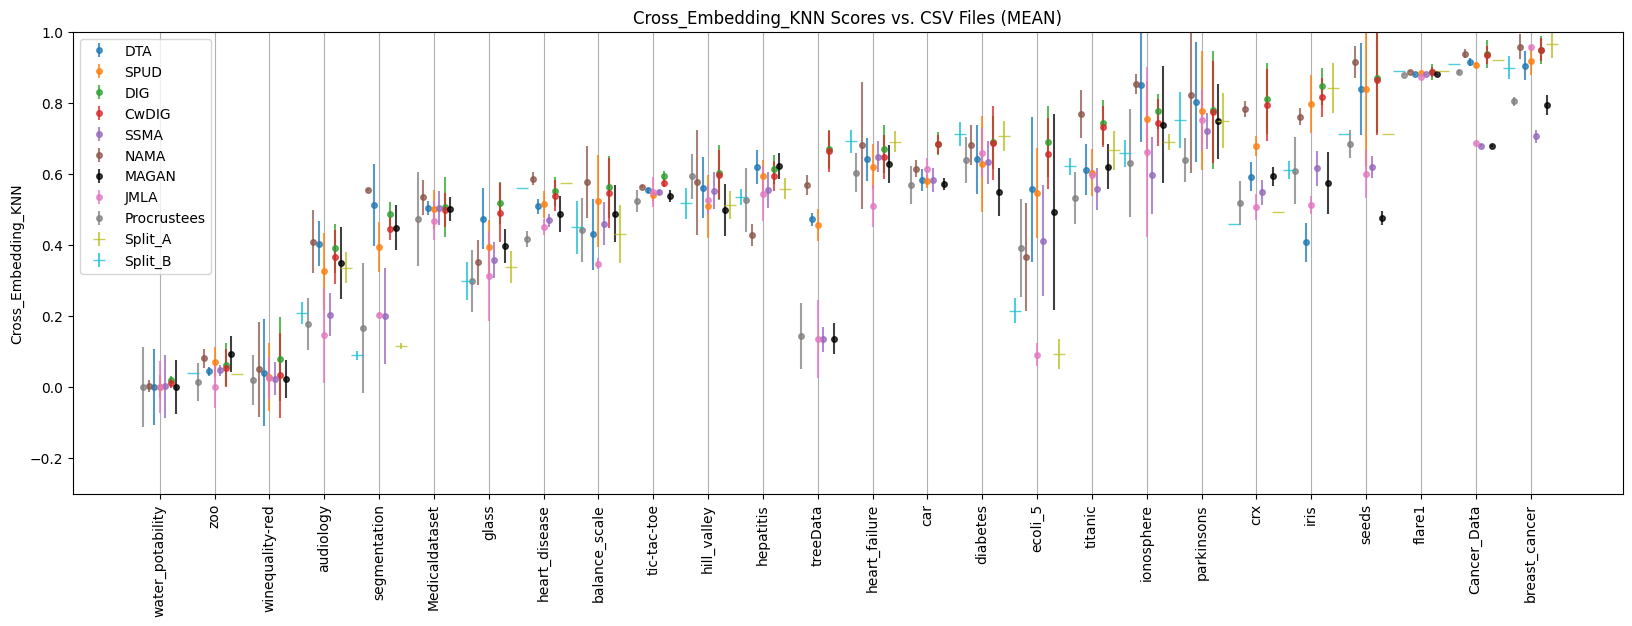

In [47]:
#plt_methods_by_CSV_mean(sort_by="NAMA") #This shows all of the data gather
plt_methods_by_CSV_mean(df = subset_df(df, split = "skewed"), metric = "Cross_Embedding_KNN", sort_by="DIG")

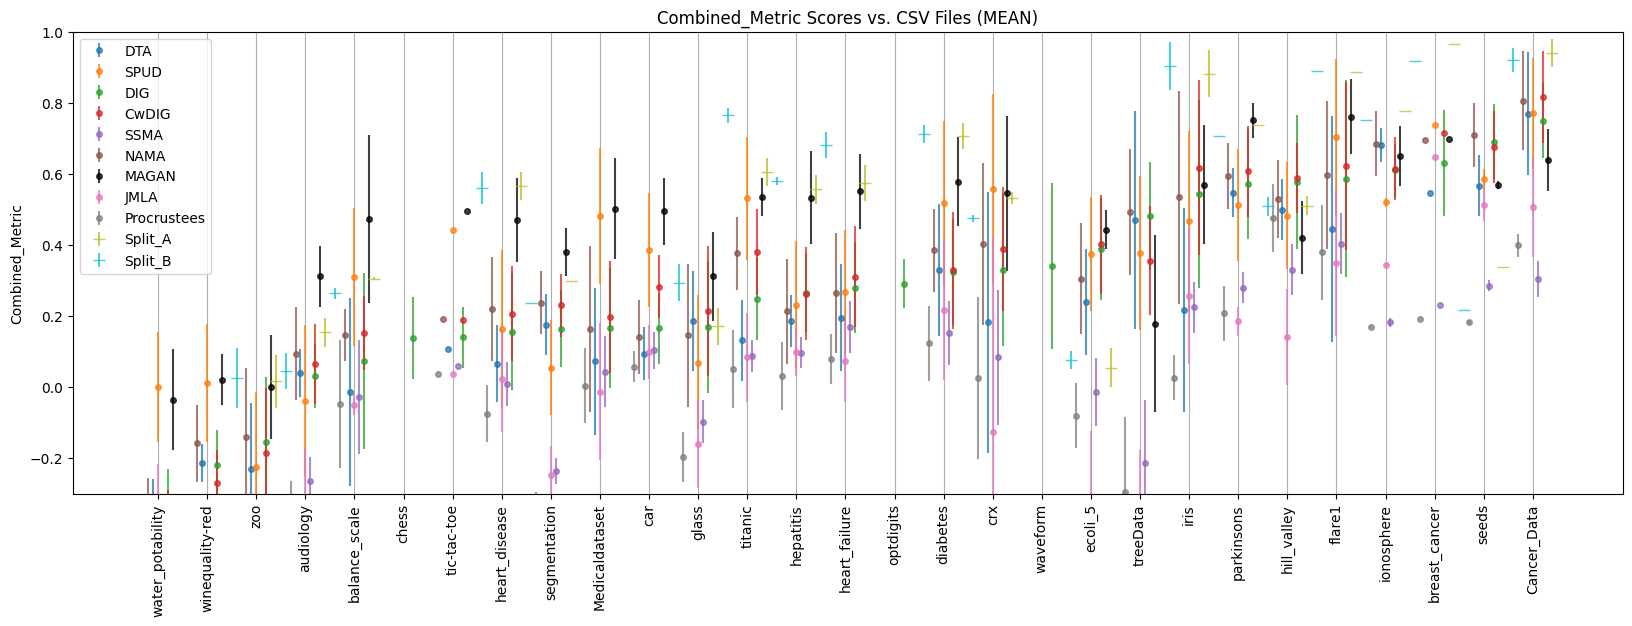

In [48]:
plt_methods_by_CSV_mean(df = subset_df(df, split = "random"), sort_by="DIG")

### Rankings
TODO: Have results for different splits

In [49]:
def get_ranks(show_more = False, **kwargs):
    #The amount of comparisions
    NUM = 10

    #Sort by Split
    split_df = subset_df(df=df, **kwargs)

    if "split" in kwargs.keys():
        split = kwargs["split"]
    else:
        split = "No"

    #Sort Df by CSV
    csv_df = plt_methods_by_CSV_max(df = split_df, return_df=True)
    csv_df = csv_df.drop(columns= ["csv_file", "Split_A", "Split_B"]).dropna()
    df_ranked = csv_df.rank(ascending=False, method='max', axis = 1)

    #This shows which method has preformed the Best overall
    print(f"Ranked across {split} Split\n-----------------------\n{df_ranked.mean(axis = 0).sort_values(ascending=True)}")
    if show_more:
        print(f"\n \nSTD of Ranks across {split} Split\n----------------------------\n{df_ranked.std(axis = 0).sort_values(ascending=True)}")
        print(f"\n\nNumber of times each Method did best for each CSV\n--------------------------------------------------\n{csv_df.idxmax(axis = 1).value_counts().sort_values(ascending=False)}")
    #print(f"\n \nDistance from Split_A and Split_B with a {split} Split\n----------------------------------------------------------\n{df_ranked[""].std(axis = 0).sort_values(ascending=True)}")

    #Get the csv file with Cross embedding as the max
    csv_df2 = plt_methods_by_CSV_max(df = split_df, return_df=True, metric = "Cross_Embedding_KNN").dropna()
    d1 = len(csv_df2)
    columns = csv_df2.columns[1:-2]

    #Add their Overall value
    print(f"\n  Combined Metric Scores\n------------------------------------------------------------------------------")
    print(pd.DataFrame(np.reshape(np.mean(csv_df.to_numpy(), axis = 0), newshape = (1,NUM)), columns = columns)._append(pd.DataFrame(np.reshape(np.mean(csv_df.to_numpy(), axis = 0), newshape = (1,NUM)), columns = columns).rank(ascending=False, method='max', axis = 1)))

    #Drop the SPlits from the df
    methods_df = csv_df2.drop(columns=["csv_file", "Split_A", "Split_B"])

    #Create the baseline Scalar, and drop NaN
    baseline = np.reshape(csv_df2.values[:, -2:].max(axis = 1), newshape = (d1,1))

    #Print out average
    print(f"\n\n\n          Distance of CE from Split A and Split B baseline on Average\n------------------------------------------------------------------------------")

    #Calculate the values and print their rank underneath
    print(pd.DataFrame(np.reshape(np.mean(methods_df.to_numpy() - baseline, axis = 0), newshape = (1,NUM)), columns = columns)._append(pd.DataFrame(np.reshape(np.mean(methods_df.to_numpy(), axis = 0), newshape = (1,NUM)), columns = columns).rank(ascending=False, method='max', axis = 1)))

    if show_more:
        print(f"\n\n\n               Distance of CE from Split A and Split B baseline\n------------------------------------------------------------------------------")

        #Calculate the values
        print(pd.DataFrame(methods_df.to_numpy() - baseline, columns = columns, index = csv_df2["csv_file"]))



In [50]:
#NOTE: DIG has the best Preformance :) --> The Rankings reflect often how well each will be away from the main one
get_ranks(show_more = True)

Ranked across No Split
-----------------------
DIG       2.964286
DTA       3.178571
CwDIG     4.642857
SPUD_D    5.000000
PCR       5.250000
JLMA      5.785714
NAMA      5.964286
SPUD      6.250000
SSMA      7.535714
MAGAN     8.535714
dtype: float64

 
STD of Ranks across No Split
----------------------------
DIG       1.502643
MAGAN     1.815206
SPUD_D    1.962614
CwDIG     2.003964
NAMA      2.027261
SSMA      2.284929
SPUD      2.661453
JLMA      3.010563
PCR       3.026121
DTA       3.067797
dtype: float64


Number of times each Method did best for each CSV
--------------------------------------------------
DTA       15
PCR        4
DIG        4
SPUD       2
JLMA       1
CwDIG      1
SPUD_D     1
Name: count, dtype: int64

  Combined Metric Scores
------------------------------------------------------------------------------
      SSMA      MAGAN       DTA    SPUD_D      SPUD       DIG     CwDIG  \
0  0.72767   0.715426  0.798255  0.797529  0.776757  0.819844  0.805946   
0  9.00

In [51]:
get_ranks(split = "random") #Seeds:  42, 1738, 1825, 2830, 3407, 3430, 5198, 7667, 9515

Ranked across random Split
-----------------------
SPUD      2.125000
CwDIG     2.750000
MAGAN     3.541667
DIG       3.791667
NAMA      4.625000
SPUD_D    5.791667
DTA       6.041667
SSMA      8.500000
PCR       8.833333
JLMA      9.000000
dtype: float64

  Combined Metric Scores
------------------------------------------------------------------------------
      SSMA     MAGAN       DTA    SPUD_D      SPUD       DIG    CwDIG  \
0  0.29851  0.679483  0.557106  0.573789  0.739395  0.657203  0.69725   
0  8.00000  3.000000  7.000000  6.000000  1.000000  4.000000  2.00000   

       NAMA        PCR      JLMA  
0  0.636005   0.273192  0.286844  
0  5.000000  10.000000  9.000000  



          Distance of CE from Split A and Split B baseline on Average
------------------------------------------------------------------------------
       SSMA     MAGAN       DTA    SPUD_D    SPUD       DIG     CwDIG  \
0 -0.166772 -0.132787 -0.097755 -0.092705 -0.1014 -0.055502 -0.070398   
0       9.0     

### Simple Ranking

In [52]:
def get_avg_df(split = "all", scoring = "Combined_Metric"):
    #Sort by Split

    #Add the values of all the dfs together
    if split == "all":
        #Create the base set
        split_df = plt_methods_by_CSV_max(df = subset_df(df=df, split = "turn"), metric = scoring, return_df=True)

        for s_type in ["distort", "even", "skewed", "random"]:
            #Add each of the sets to the dataframe
            split_df = split_df._append(plt_methods_by_CSV_max(df = subset_df(df=df, split = s_type), metric = scoring, return_df=True))

    else:
        #Create the df 
        split_df = plt_methods_by_CSV_max(df = subset_df(df=df, split = split), metric = scoring, return_df=True)

    #Drop unneeded columns
    csv_df = split_df.drop(columns= ["csv_file", "Split_A", "Split_B"]).dropna()

    #Create csv df
    csv_df = (pd.DataFrame(np.reshape(np.mean(csv_df.to_numpy(), axis = 0), newshape = (1,10)), columns = csv_df.columns)._append(pd.DataFrame(np.reshape(np.mean(csv_df.to_numpy(), axis = 0), newshape = (1,10)), columns = csv_df.columns).rank(ascending=False, method='max', axis = 1))).reset_index().sort_values(by = 0, ascending = False, axis=1).drop(columns = ["index"])

    #Rename the index
    csv_df.index = [split, "rankings"]

    return csv_df
    

In [53]:
def find_df_differences(split = "all"):
    df = get_avg_df(split).head(1)

    #Save the df columns
    columns = df.columns

    #Convert to numpy array
    array = df.to_numpy()

    #Get the max values
    max_values = np.max(array, axis=1, keepdims=True)

    #Subtract the values
    result = max_values - array

    #return as df
    return pd.DataFrame(result, columns = columns)

<Axes: >

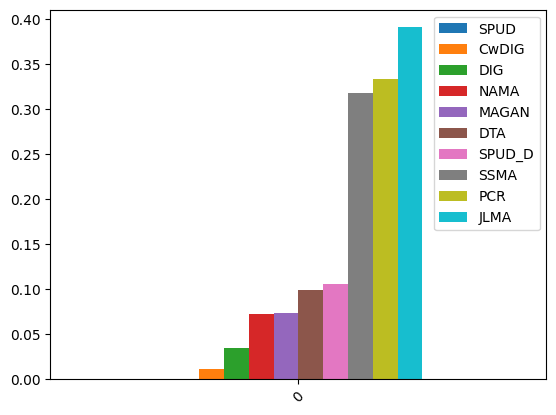

In [54]:
find_df_differences(split = "all").plot(kind = "bar", rot = 45)

<Axes: >

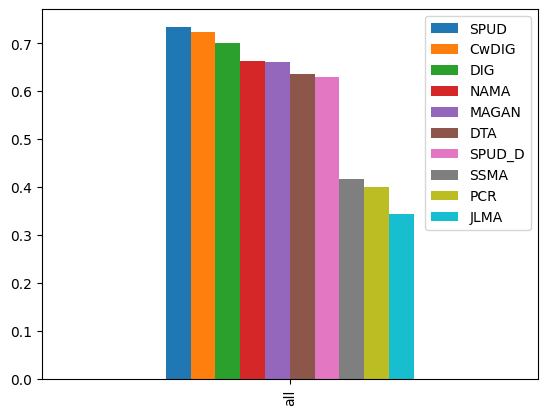

In [55]:
get_avg_df().head(1).plot(kind = "bar", rot = 90)

In [56]:
get_avg_df(split = "random")

,SPUD,CwDIG,MAGAN,DIG,NAMA,SPUD_D,DTA,SSMA,JLMA,PCR
random,0.739395,0.69725,0.679483,0.657203,0.636005,0.573789,0.557106,0.29851,0.286844,0.273192
rankings,1.000000,2.00000,3.000000,4.000000,5.000000,6.000000,7.000000,8.00000,9.000000,10.000000


#### Plotting these simple rankings 

In [57]:
def plot_simple_ranks(plot_type = "bar", scoring = "Combined_Metric"):
    #Create a dataframe to add too:
    df = get_avg_df(scoring = scoring).head(1).drop(columns = ["SPUD_D"])

    #Add all the other dfs
    for kind in ["random", "skewed", "even", "distort", "turn"]:
        df = df._append(get_avg_df(scoring = scoring, split = kind).head(1).drop(columns = ["SPUD_D"]))
    
    
    return df.plot(kind = plot_type, rot = 0, figsize = (17, 6))


<Axes: >

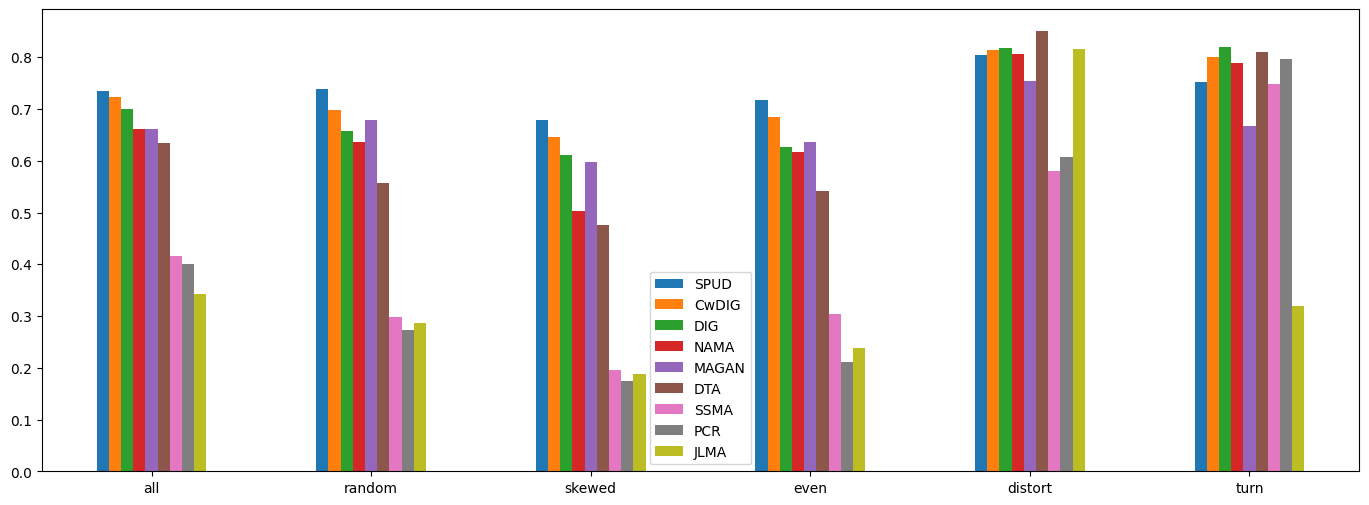

In [58]:
plot_simple_ranks(plot_type = "bar", scoring = "Combined_Metric")

### Using CSV Files to get error bars

In [11]:
def get_mean_std_df(split = "all", scoring = "Combined_Metric", **kwargs):
    #Sort by Split

    #Add the values of all the dfs together
    if split == "all":
        #Create the base set
        split_df = plt_methods_by_CSV_max(df = subset_df(df=df, split = "turn", **kwargs), metric = scoring, return_df=True)

        for s_type in ["distort", "even", "skewed", "random"]:
            #Add each of the sets to the dataframe
            split_df = split_df._append(plt_methods_by_CSV_max(df = subset_df(df=df, split = s_type, **kwargs), metric = scoring, return_df=True))

    else:
        #Create the df 
        split_df = plt_methods_by_CSV_max(df = subset_df(df=df, split = split, **kwargs), metric = scoring, return_df=True)

    #Drop unneeded columns
    csv_df = split_df.drop(columns= ["SPUD_D", "csv_file", "Split_A", "Split_B"]).dropna()

    #Create csv df
    csv_df_std = pd.DataFrame(np.reshape(np.std(csv_df.to_numpy(), axis = 0), newshape = (1,9)), columns = csv_df.columns)
    csv_df = csv_df_std._append((pd.DataFrame(np.reshape(np.mean(csv_df.to_numpy(), axis = 0), newshape = (1,9)), columns = csv_df.columns)._append(pd.DataFrame(np.reshape(np.mean(csv_df.to_numpy(), axis = 0), newshape = (1,9)), columns = csv_df.columns).rank(ascending=False, method='max', axis = 1))).reset_index().sort_values(by = 0, ascending = False, axis=1).drop(columns = ["index"]))


    #Rename the index
    csv_df.index = ["STD", "Mean", "rankings"]

    return csv_df
    

In [116]:
def plot_ranks(scoring = "Combined_Metric", **kwargs):

    #Create a dataframe to add too:
    agregate_df = get_mean_std_df(scoring = scoring, **kwargs).head(2)

    #Add all the other dfs
    for kind in ["random", "skewed", "even", "distort", "turn"]:
        agregate_df = agregate_df._append(get_mean_std_df(scoring = scoring, split = kind, **kwargs).head(2))
    
    #Reset index
    agregate_df.index = ["STD - all", "MEAN - all", "STD - random", "MEAN - random","STD - skewed", "MEAN - skewed","STD - even", "MEAN - even","STD - distort", "MEAN - distort","STD - turn", "MEAN - turn"]

    # Sort columns based on the 'MEAN - all' row
    sorted_columns = agregate_df.loc['MEAN - all'].sort_values(ascending = False).index
    agregate_df = agregate_df[sorted_columns]
    columns = agregate_df.columns
    x = np.array(range(len(columns))) / 15
    
    # Plotting
    plt.figure(figsize=(14, 8))

    legend = True

    
    # Define the colorblind-friendly colors
    colors = ['#000000', '#e41a1c', '#377eb8', 
              '#4daf4a', '#984ea3', '#ff7f00', 
              '#a65628', '#f781bf', '#999999']
    
    for i in range(0, len(agregate_df), 2):
        std_values = agregate_df.iloc[i].values
        mean_values = agregate_df.iloc[i+1].values

        for pos, mean, std, label, c in zip(x, mean_values, std_values, columns, colors):
            
            #change the format
            if pos < x[3]:
                fmt = 'o'
            else:
                fmt = "^"

            #Rename DIG to MAD
            if label == "DIG":
                label = "MASH-"
            elif label == 'CwDIG':
                label = "MASH"
            elif label == 'PCR':
                label = "MAPA"

            plt.errorbar(pos - 0.3, mean, yerr=std, fmt=fmt, label=label, elinewidth= 2, color = c, ms = 10, capsize=5)

        if legend:
            plt.legend(fontsize = 16, loc = (0.64, 0.01))
            legend = False

        #Move the positions over
        x += 1
    
    
    plt.xticks(np.array(range(0,6)) + 0.19, ["all", "random", "skewed", "even", "distort", "rotation"], fontsize = 20, rotation=0)
    plt.yticks(fontsize=16)
    #plt.xlabel('Domain Adaptation Methods', fontsize=15)
    plt.ylabel('Combined Metric', fontsize=20)
    plt.title('Comparison of Results', fontsize=25)
    plt.grid(visible=True, axis = "y")
    plt.tight_layout()
    plt.show()

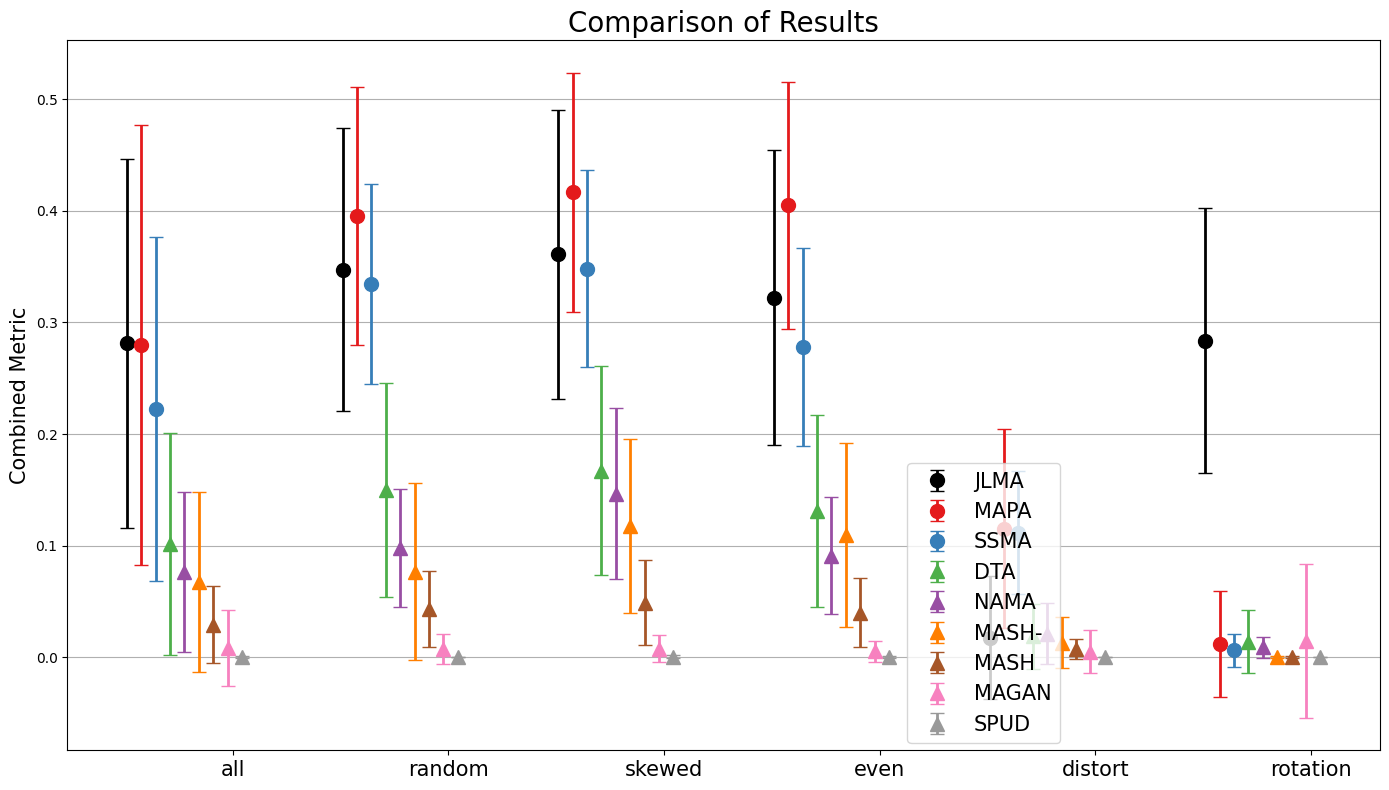

In [50]:
plot_ranks(scoring = "FOSCTTM")

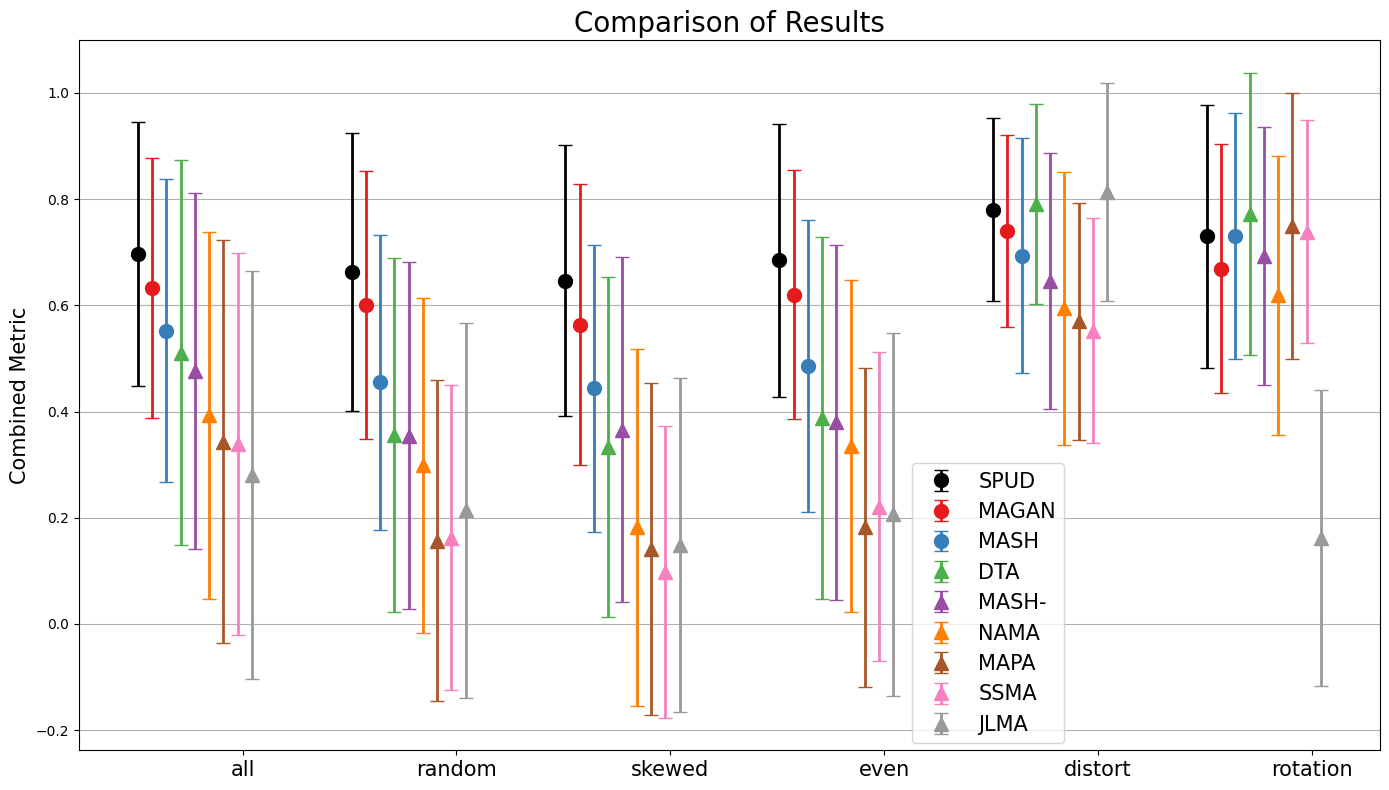

In [51]:
plot_ranks(Percent_of_Anchors = 0.05)

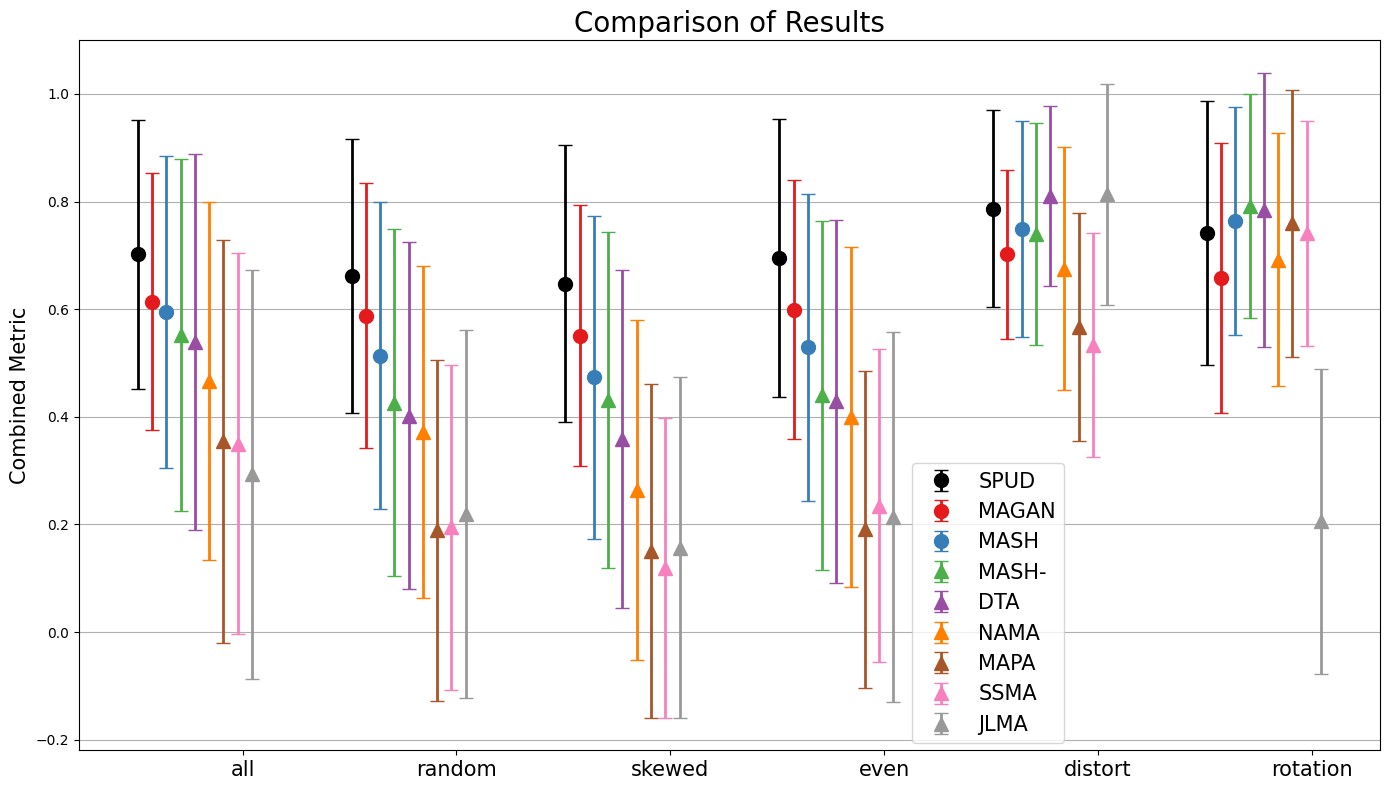

In [52]:
plot_ranks(Percent_of_Anchors = 0.1)

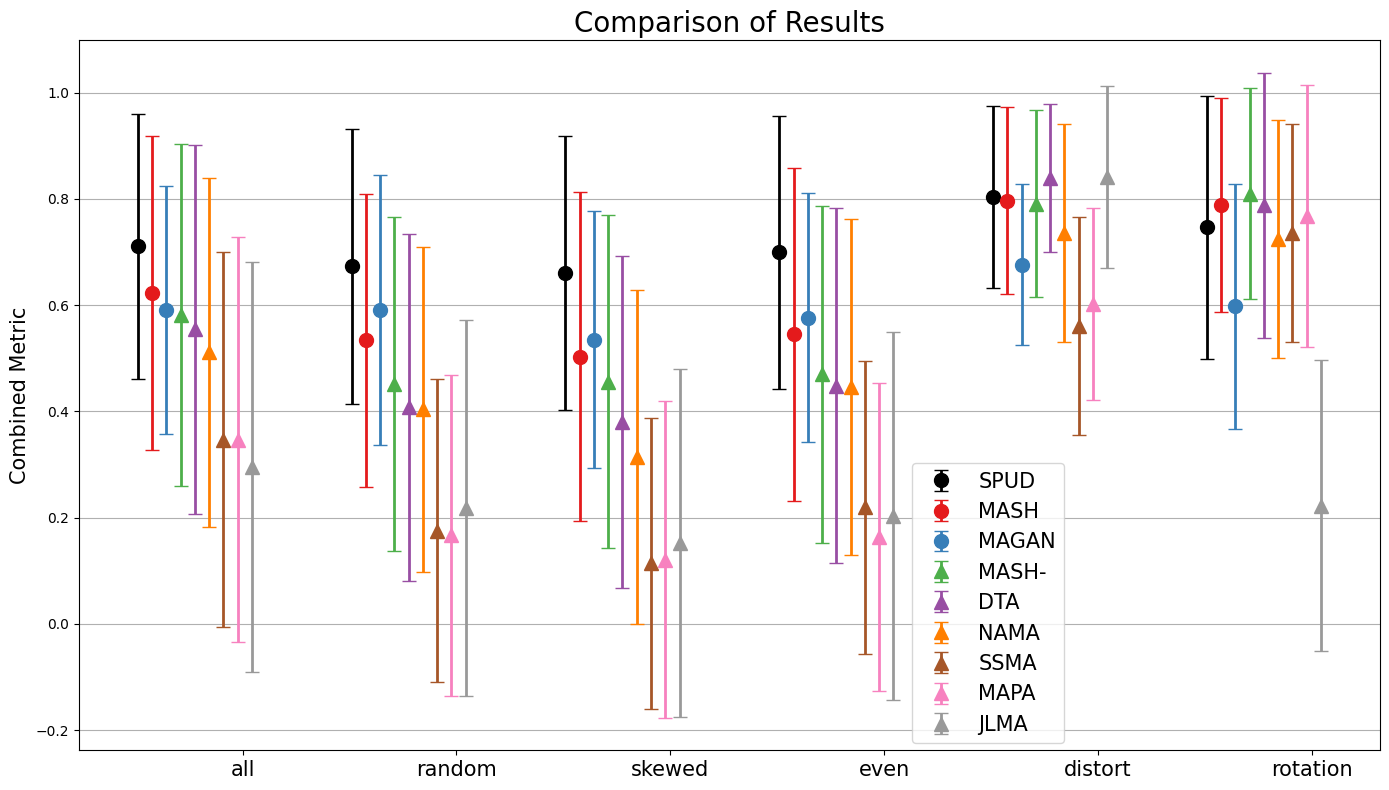

In [53]:
plot_ranks(Percent_of_Anchors = 0.15)

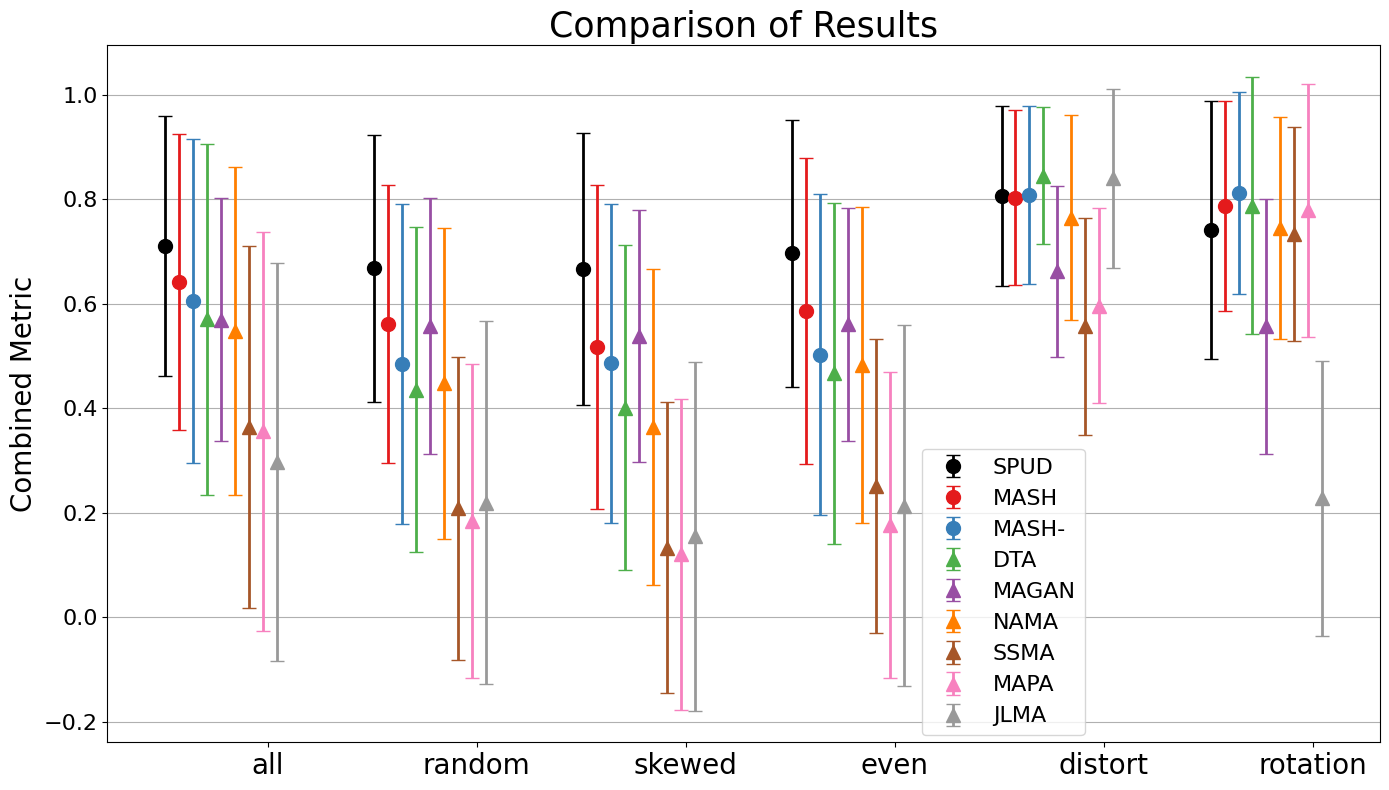

In [117]:
plot_ranks(Percent_of_Anchors = 0.2)

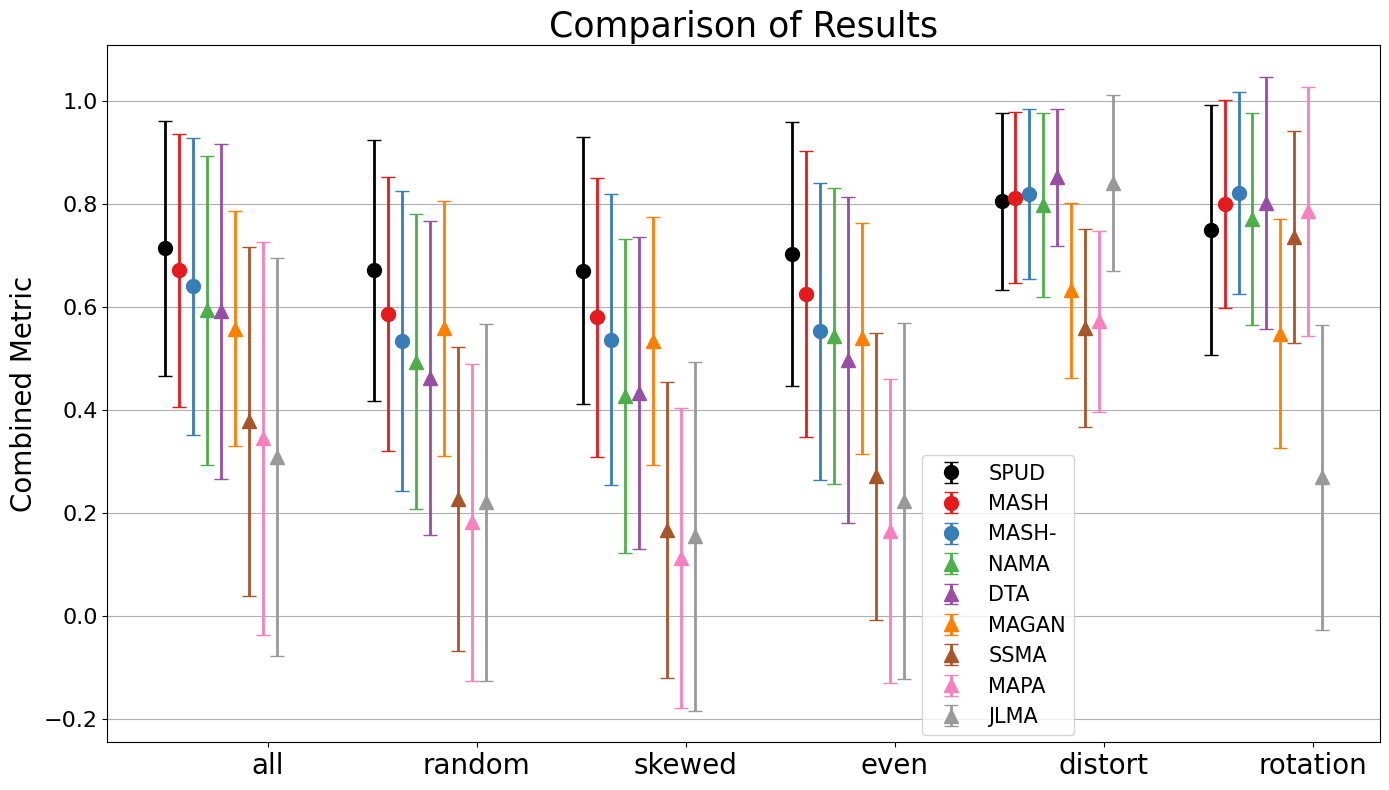

In [115]:
plot_ranks(Percent_of_Anchors = 0.3)

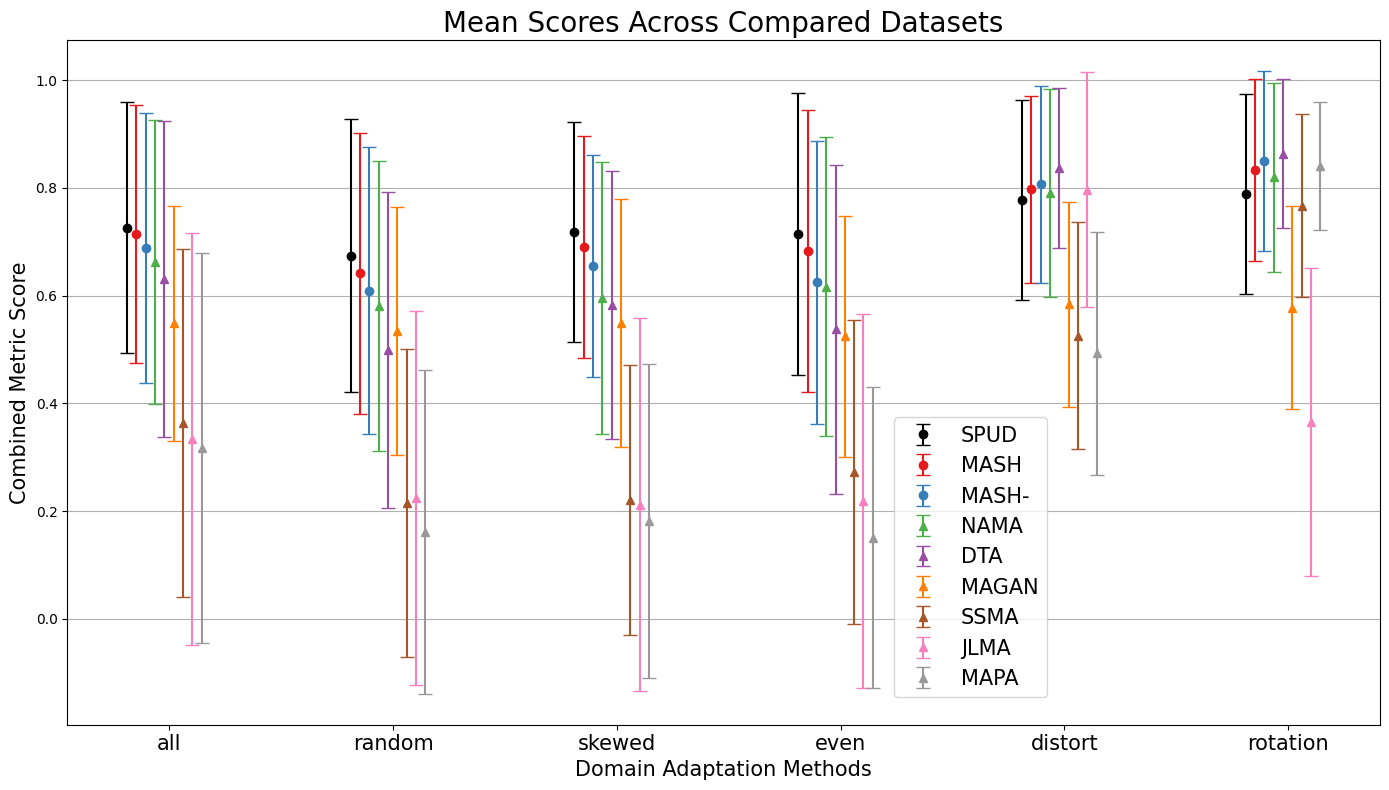

In [75]:
plot_ranks(Percent_of_Anchors = 0.5)

## Comparing Parameters across all methods

### KNN and Percent of Anchors

In [115]:
df.columns

Index(['csv_file', 'method', 'seed', 'split', 'KNN', 'Percent_of_KNN',
       'Percent_of_Anchors', 'Page_Rank', 'Predicted_Feature_MAE', 'Operation',
       'SPUDS_Algorithm', 'FOSCTTM', 'Cross_Embedding_KNN',
       'A_Classification_Score', 'B_Classification_Score', 'Combined_Metric'],
      dtype='object')

In [132]:
def line_plot_methods(df_subset = df, argument = "Percent_of_Anchors", metric = "Combined_Metric", plt_legend = False, custom_title = False):
    "subset should equal none or the csv file name"

    #Fix DataFrame if it was bad values
    df_subset = df_subset[~(df_subset["Percent_of_Anchors"].astype(float) > 0.5)]

    #Create figure
    plt.figure(figsize=(14,7))

    # Group by 'csv_file' and 'argument' to get the max 'metric' for each file and argument
    SSMA = df_subset[df_subset["method"] == "SSMA"].groupby(['csv_file', argument])[metric].max().reset_index()
    DIG = df_subset[df_subset["method"] == "DIG"].groupby(['csv_file', argument])[metric].max().reset_index()
    CwDIG = df_subset[df_subset["method"] == "CwDIG"].groupby(['csv_file', argument])[metric].max().reset_index()
    JLMA = df_subset[df_subset["method"] == "JLMA"].groupby(['csv_file', argument])[metric].max().reset_index()
    MAGAN = df_subset[df_subset["method"] == "MAGAN"].groupby(['csv_file', argument])[metric].max().reset_index()
    MAPA = df_subset[df_subset["method"] == "PCR"].groupby(['csv_file', argument])[metric].max().reset_index()
    SPUD = df_subset[df_subset["SPUDS_Algorithm"] == "merge"].groupby(['csv_file', argument])[metric].max().reset_index()
    DTA = df_subset[df_subset["method"] == "DTA"].groupby(['csv_file', argument])[metric].max().reset_index()


    #Keywords arguments
    line_styles = {"linewidth" : 3,
                   "linestyle" : '-'
                   }



    #Plot the graphs
    plt.plot(SPUD.groupby(argument)[metric].mean(), label = "SPUD", color = '#000000', **line_styles)
    plt.plot(CwDIG.groupby(argument)[metric].mean(), label = "MASH", color ='#e41a1c', **line_styles)
    plt.plot(DIG.groupby(argument)[metric].mean(), label = "MASH-", color =  '#377eb8', **line_styles)    
    plt.plot(DTA.groupby(argument)[metric].mean(), label = "DTA", color = "#4daf4a", **line_styles)
    plt.plot(MAGAN.groupby(argument)[metric].mean(), label = "MAGAN", color = "#984ea3", **line_styles)

    if argument != "Percent_of_KNN":
        NAMA = df_subset[df_subset["method"] == "NAMA"].groupby(['csv_file', argument])[metric].max().reset_index()
        plt.plot(NAMA.groupby(argument)[metric].mean(), label = "NAMA", color = "#ff7f00", **line_styles)
        
    plt.plot(SSMA.groupby(argument)[metric].mean(), label = "SSMA", color = "#a65628", **line_styles) #I want the max, and then the mean of the csvs    
    plt.plot(MAPA.groupby(argument)[metric].mean(), label = "MAPA", color = "#f781bf", **line_styles )
    plt.plot(JLMA.groupby(argument)[metric].mean(), label = "JLMA", color = "#999999", **line_styles)



    #Make it pretty
    plt.xlabel(argument.replace('_', " "), fontsize = 20)
    plt.ylabel(metric.replace('_', " "), fontsize = 20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

    if plt_legend != False:
        plt.legend(fontsize=16, loc = plt_legend, ncol = 3)

    if custom_title != False:
        plt.title(custom_title, fontsize = 25)


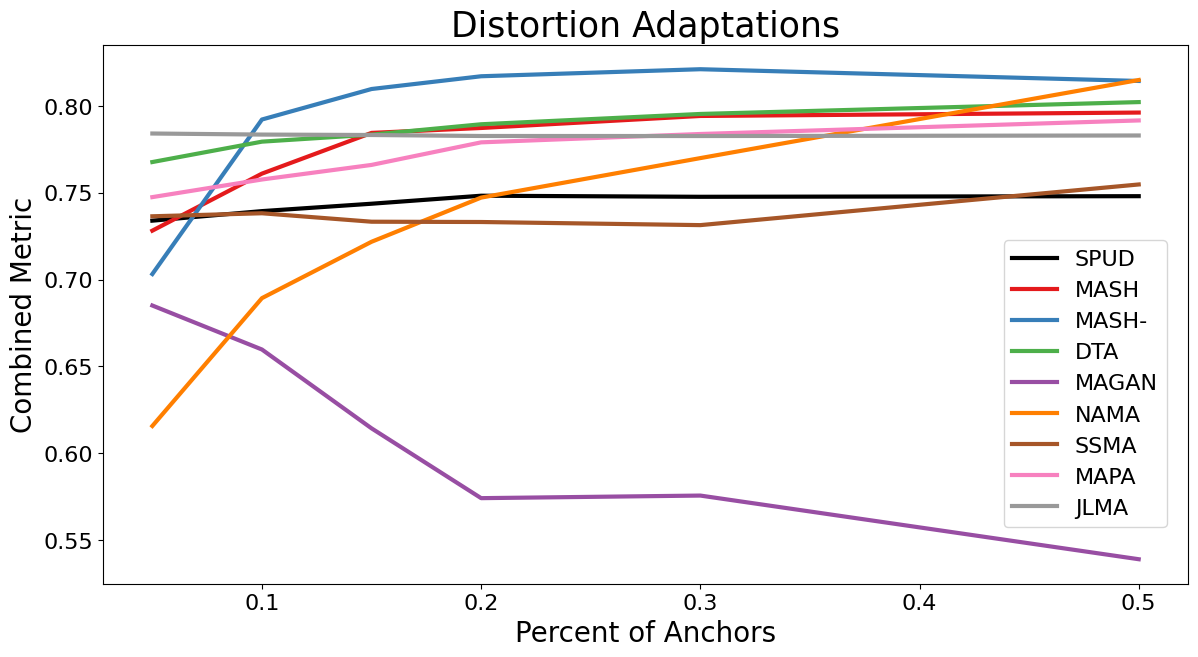

In [130]:
distort_turn = df[df["split"].isin(["distort", "turn"])]
line_plot_methods(df_subset = distort_turn, metric = "Combined_Metric", custom_title="Distortion Adaptations", plt_legend = (0.83, 0.105))

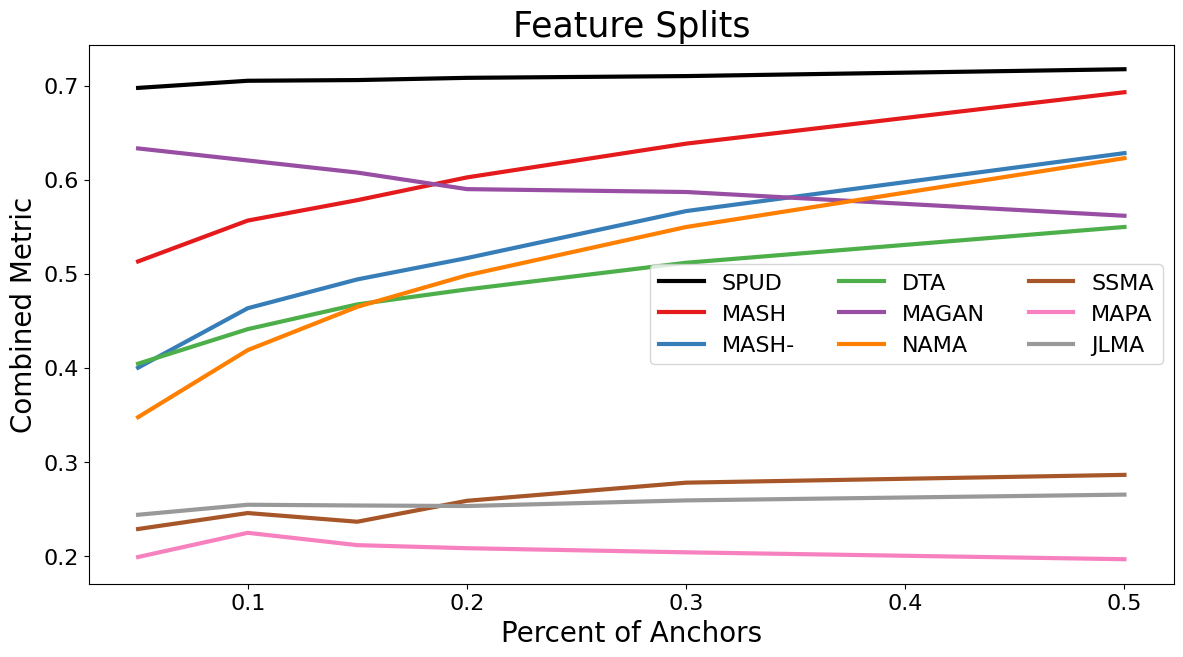

In [133]:
feature_splits = df[~df["split"].isin(["distort", "turn"])]
line_plot_methods(df_subset = feature_splits, metric = "Combined_Metric", plt_legend = "best", custom_title="Feature Splits")

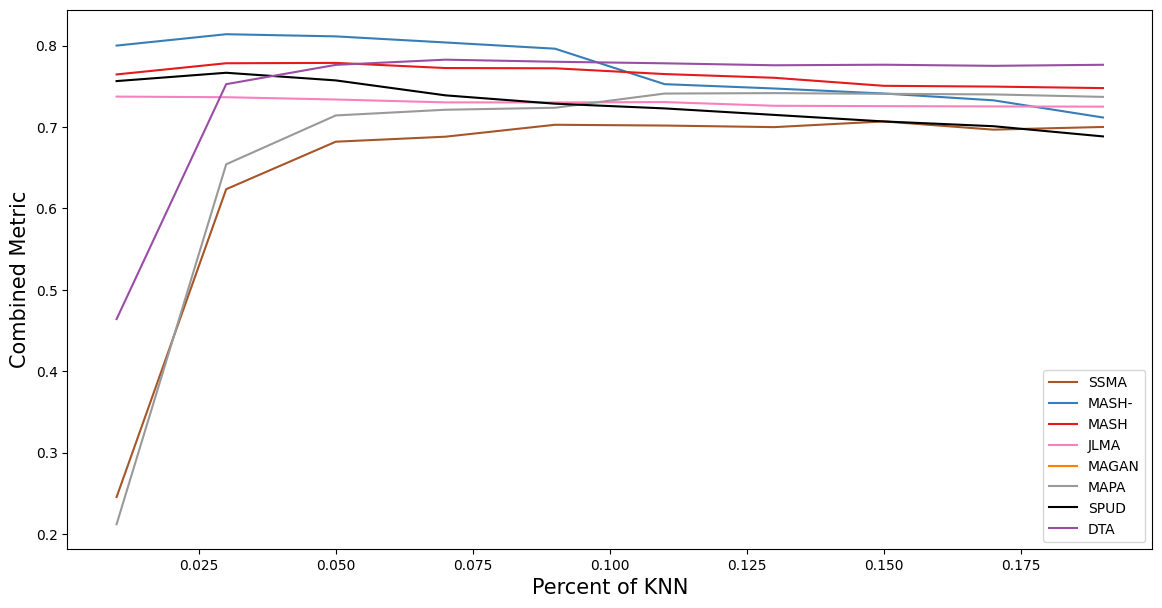

In [6]:
line_plot_methods(argument = "Percent_of_KNN") #csv_file = "iris"

### Sparse Data comparison

#### Set Up

In [31]:
from SPUD_Copy import SPUD_Copy
from DIG import DIG

In [32]:
sparse_dc = tma.test_manifold_algorithms(csv_file="seeds.csv", split= "skewed", percent_of_anchors= [0.8], verbose=2, random_state=42)
sparse_dc.split_A = sparse_dc.split_A
sparse_dc.split_B = sparse_dc.split_B
#Randomly select points
import random
random_points = random.sample(range(len(sparse_dc.split_A)), k = int(len(sparse_dc.split_A)/10))

#Create the macthing anchors
sparse_dc.anchors = np.array([range(int(len(sparse_dc.split_A)/10)), random_points]).T

#Subset split A to only have some of the points
sparse_dc.split_A = sparse_dc.split_A[random_points]

#Create labels
sparse_labels = np.hstack([sparse_dc.labels[random_points], sparse_dc.labels])


 
 
---------------------------       Initalizing class with seeds.csv data       ---------------------------

Splitting the data in a skewed fashion
Split A features shape: (199, 3)
Split B Features shape (199, 4)
MDS initialized with 3 components
The knn values are: (2, 6, 10, 14, 18, 22, 26, 30, 34, 38)


#### Sparse DIG

In [33]:
sparse_DIG = DIG(sparse_dc.split_A, sparse_dc.split_B, sparse_dc.anchors, DTM = "log", knn = 4)

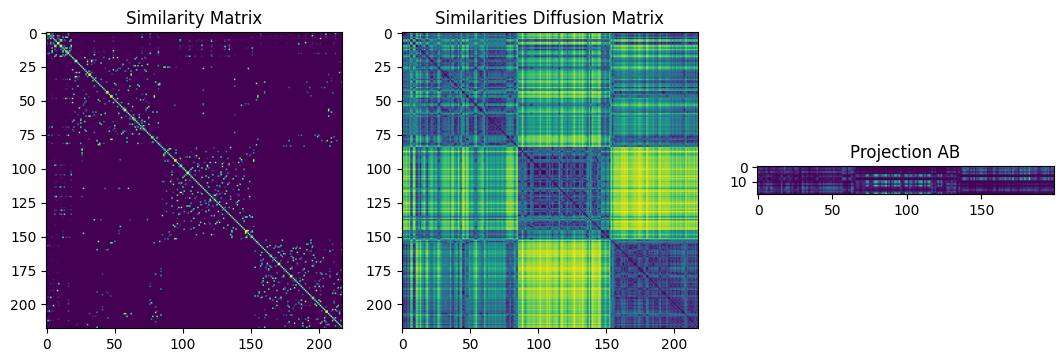

In [34]:
sparse_DIG.plot_graphs()

Model Stress: 91.00021307559541
Cross Embedding: 0.8391959798994975
Can't compute FOSCTTM with different domain shapes.


AttributeError: PathCollection.set() got an unexpected keyword argument 'show_pred'

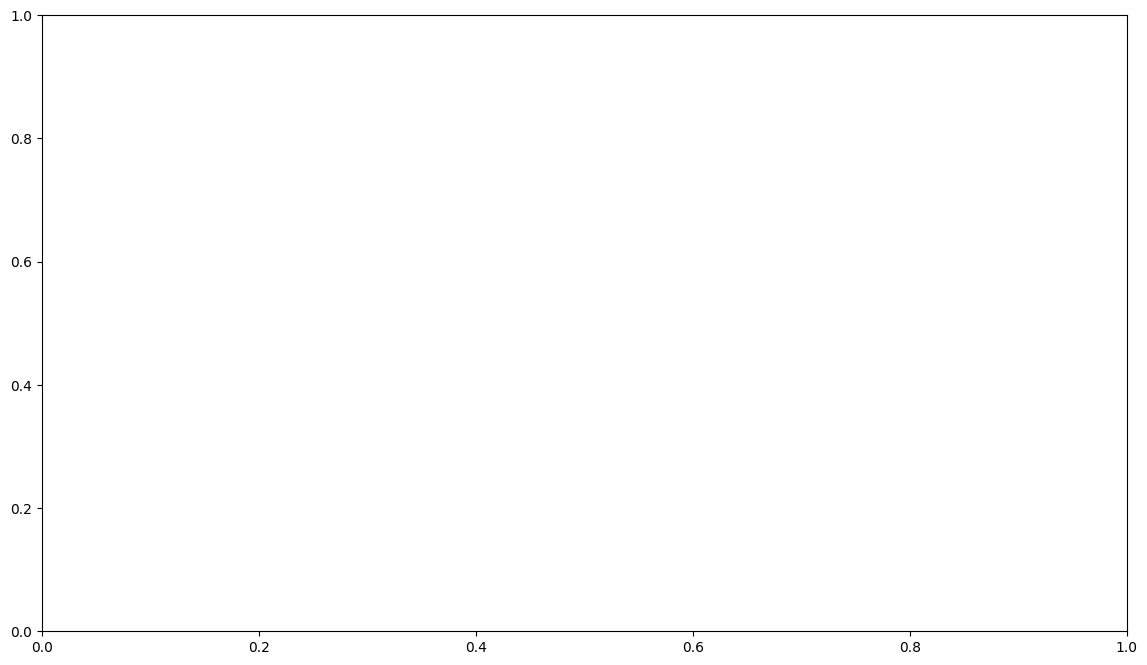

In [35]:
sparse_DIG.plot_emb(sparse_labels, show_lines = False, show_anchors = False, show_pred = True)

#### Sparse SPUD

In [ ]:
sparse_spud = SPUD_Copy(sparse_dc.split_A, sparse_dc.split_B, sparse_dc.anchors, operation = "sqrt", knn = 4)
#sparse_spud.plot_graphs()

Model Stress: 119.01061572536022
Cross Embedding: 0.8118222692409416
Can't compute FOSCTTM with different domain shapes.


AssertionError: To show the lines, domain A and domain B must be the same size.

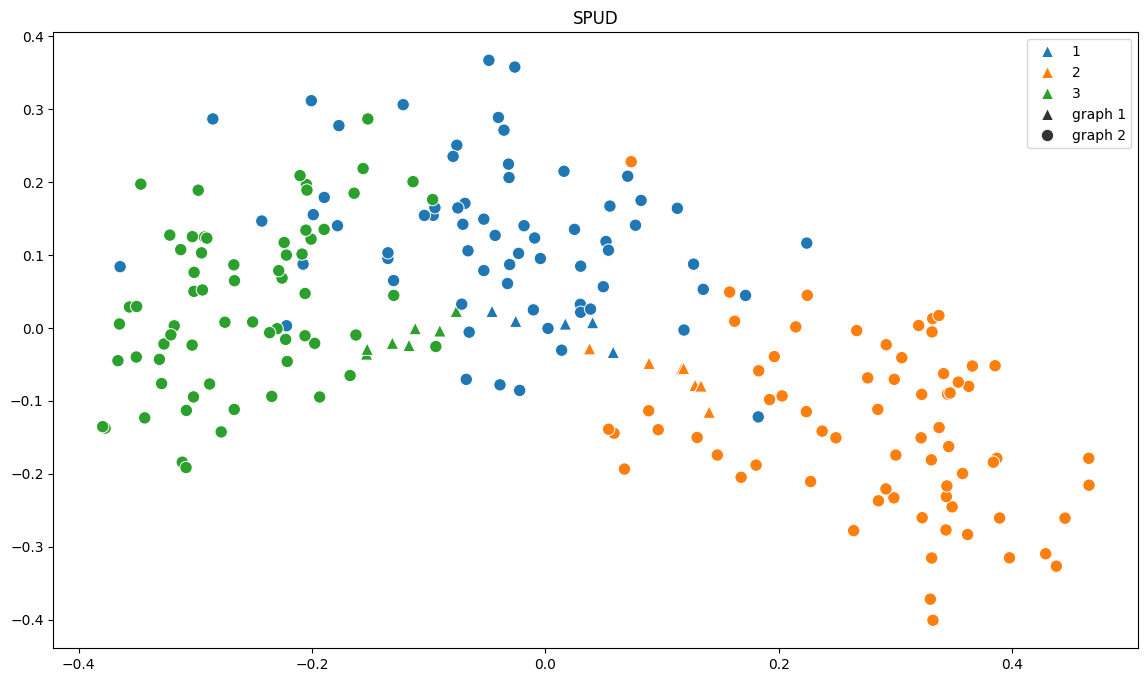

In [24]:

sparse_spud.plot_emb(sparse_labels, show_lines = True, show_anchors = True)

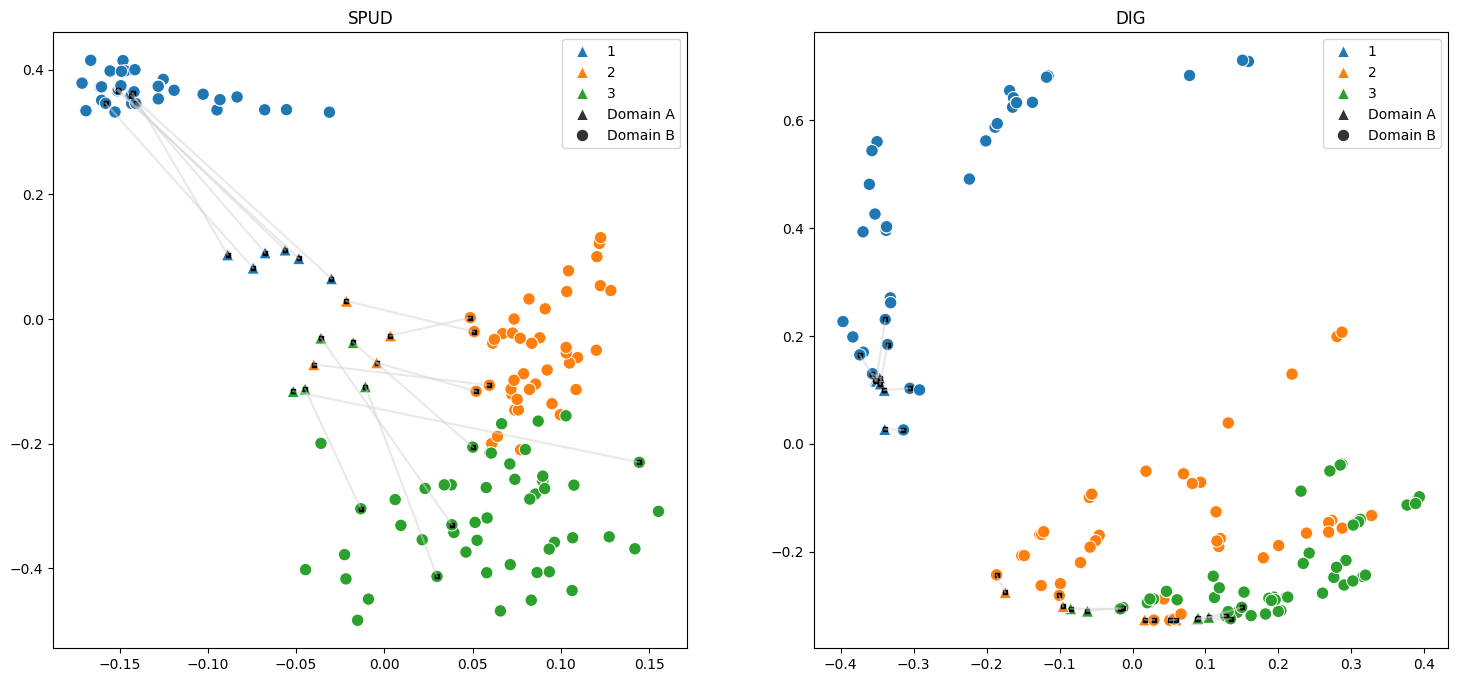

<Figure size 1400x800 with 0 Axes>

In [ ]:
#Plot them side by side
fig, axes = plt.subplots(1, 2, figsize = (18, 8))

#Set Title
axes[0].set_title("SPUD")
axes[1].set_title("DIG")

#Veiw the manifold. Those shown as Triangles are from GX
styles = ['Domain A' if i < sparse_spud.len_A else 'Domain B' for i in range(len(sparse_spud.emb[:]))]
plt.figure(figsize=(14, 8))

#Now plot the points
import seaborn as sns
sns.scatterplot(x = sparse_spud.emb[:, 0], y = sparse_spud.emb[:, 1], style = styles, hue = pd.Categorical(sparse_labels), s=80, markers= {"Domain A": "^", "Domain B" : "o"}, ax = axes[0])
sns.scatterplot(x = sparse_DIG.emb[:, 0], y = sparse_DIG.emb[:, 1], style = styles, hue = pd.Categorical(sparse_labels), s=80, markers= {"Domain A": "^", "Domain B" : "o"}, ax = axes[1])

#To plot line connections
for position, point in enumerate(random_points):
    axes[0].plot([sparse_spud.emb[position, 0], sparse_spud.emb[sparse_spud.len_A + point, 0]], [sparse_spud.emb[position, 1], sparse_spud.emb[sparse_spud.len_A + point, 1]], color = 'lightgrey', alpha = .5)
    axes[1].plot([sparse_DIG.emb[position, 0], sparse_DIG.emb[sparse_DIG.len_A + point, 0]], [sparse_DIG.emb[position, 1], sparse_DIG.emb[sparse_DIG.len_A + point, 1]], color = 'lightgrey', alpha = .5)

#Put black dots on the Anchors
axes[0].scatter(sparse_spud.emb[sparse_spud.known_anchors + np.array([0, sparse_spud.len_A]), 0], sparse_spud.emb[sparse_spud.known_anchors + np.array([0, sparse_spud.len_A]), 1], s = 10, color = 'black', marker="s")
axes[1].scatter(sparse_DIG.emb[sparse_DIG.known_anchors + np.array([0, sparse_spud.len_A]), 0], sparse_DIG.emb[sparse_DIG.known_anchors + np.array([0, sparse_spud.len_A]), 1], s = 10, color = 'black', marker="s")


#Show plot
plt.show()

## Label Prediction Visualization

In [9]:
import DIG_final
dc = tma.test_manifold_algorithms(csv_file="seeds.csv", split= "distort", percent_of_anchors= [0.8], verbose=2, random_state=42)


 
 
---------------------------       Initalizing class with seeds.csv data       ---------------------------

Creating a mirror dataset and distorting the features in the second Domain
Split A features shape: (199, 7)
Split B Features shape (199, 7)
MDS initialized with 7 components
The knn values are: (2, 6, 10, 14, 18, 22, 26, 30, 34, 38)


Cross Embedding: 0.864321608040201
Can't compute FOSCTTM with different domain shapes.


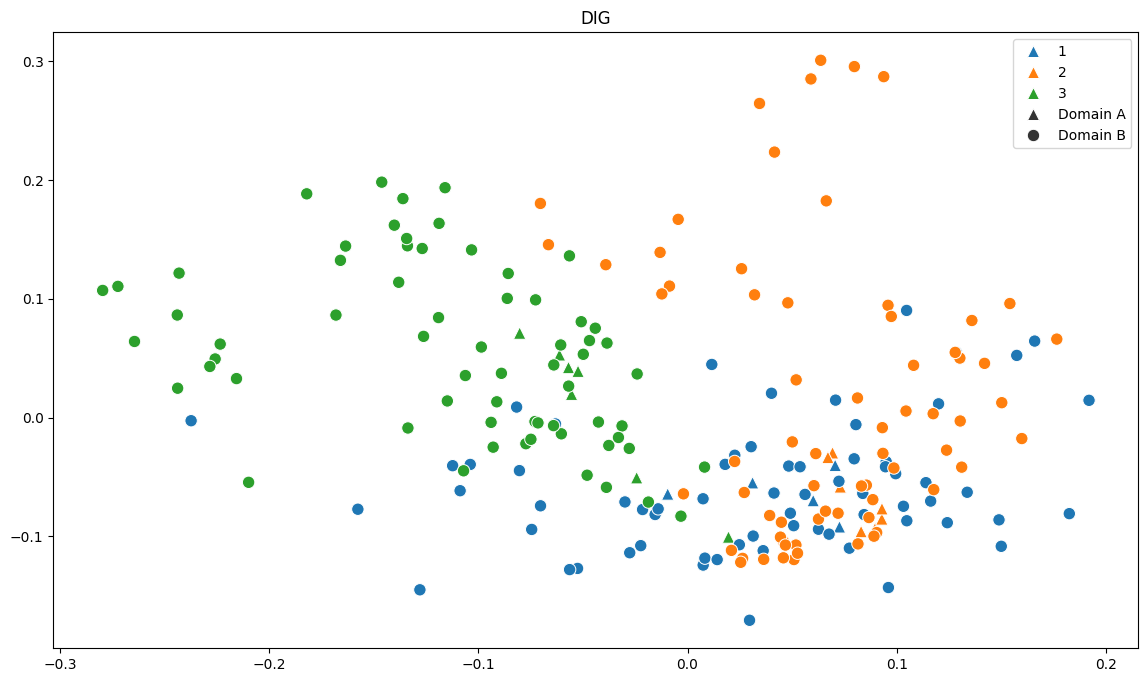

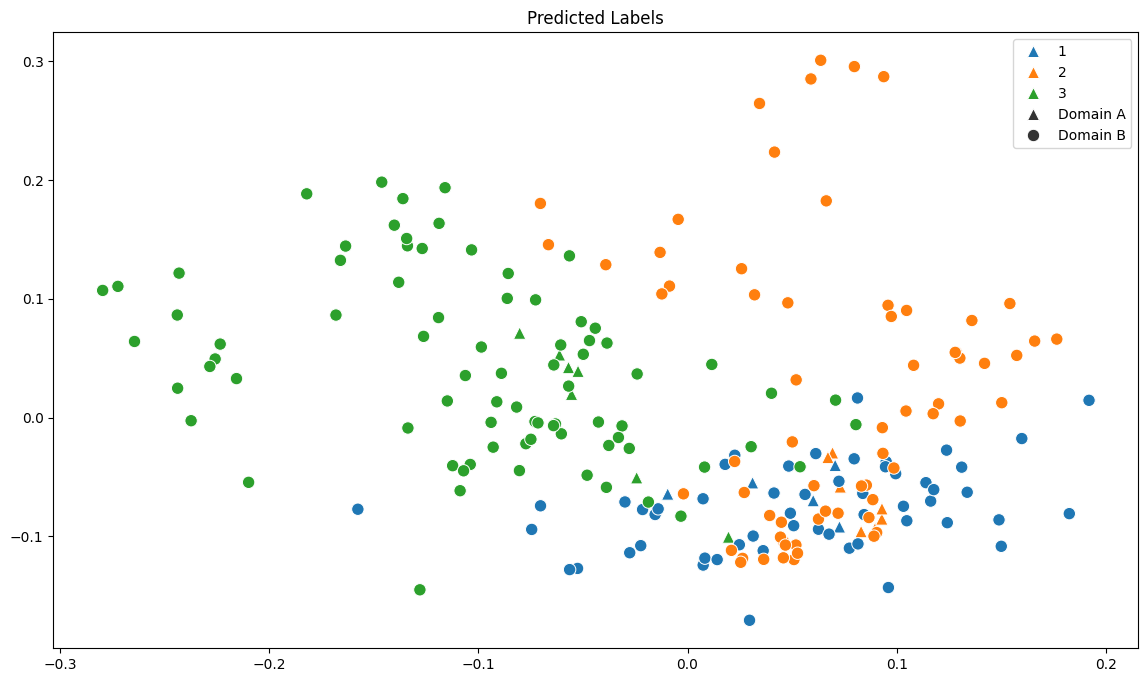

In [11]:
LPD = DIG_final.DIG()
LPD.fit(sparse_dc.split_A, sparse_dc.split_B, sparse_dc.anchors)
LPD.plot_emb(sparse_labels, show_lines = False, show_anchors = False, show_pred = True, n_comp = 7) #Gets the embedding we can use

## Plotting the Embeddings

Data Sets that dont make sense:
Flare1 - Most of the points belong to the same class, so the CE will be high regardless of alignment

In [ ]:
visual_test = tma.test_manifold_algorithms(csv_file="ecoli_5.csv", split= "even", percent_of_anchors= [0.1], verbose=2)


 
 
---------------------------       Initalizing class with ecoli_5.csv data       ---------------------------

Spliting the data evenly
Split A features shape: (327, 4)
Split B Features shape (327, 3)
MDS initialized with 3 components
The knn values are: (2, 9, 16, 23, 30, 37, 44, 51, 58, 65)


In [ ]:
visual_test.plot_embeddings(knn = 5)

Percent of anchors used: 0.1
The amount of Nearest Neighbors: 5


NameError: name 'SPUD' is not defined

# Time Comparisions Below

In [ ]:
#Print the complexity of CSV files and the time it takes
time_df = pd.read_csv(os.getcwd()[:-12] + "ManifoldData/Time_DataFrame.csv").sort_values(by = str("iris.csv"), ignore_index=True)

#Add the amount of features for each csv file
for csv_file in time_df.columns:

    #Continue the loop if the header is Methods
    if csv_file == "Methods":

        #Create dictionaries to store feature count and instance count
        feature_dict = {"Methods" : 0}
        instance_dict = {"Methods" : "Feature Count"}
        complexity_dict = {"Methods" : "Complexity"}

        continue

    #Calulate the spcial cases
    elif csv_file == "S-curve":
        #Count Features
        feature_dict[csv_file] = 600

        #Count Instances
        instance_dict[csv_file] = 3
        complexity_dict[csv_file] = 1800

        continue

    #Calulate the spcial cases
    elif csv_file == "blobs":
        #Count Features
        feature_dict[csv_file] = 300

        #Count Instances
        instance_dict[csv_file] = 2
        complexity_dict[csv_file] = 600

        continue


    file_path = "/yunity/arusty/Graph-Manifold-Alignment/CSV Files/" + csv_file

    #Read file
    df2 = pd.read_csv(file_path)

    #Count Features
    feature_dict[csv_file] = len(df2)

    #Count Instances
    instance_dict[csv_file] = len(df2.columns)

    #Calculate complexity 
    complexity_dict[csv_file] = len(df2) * len(df2.columns)

#Append the Dictionaries
time_df = time_df._append(feature_dict, ignore_index=True)
time_df = time_df._append(instance_dict, ignore_index=True)
time_df = time_df._append(complexity_dict, ignore_index=True)


#Veiw the DataFrame
time_df.T.sort_values(by = 6).T

,Methods,zoo.csv,hepatitis.csv,iris.csv,audiology.csv,parkinsons.csv,seeds.csv,segmentation.csv,glass.csv,heart_disease.csv,...,titanic.csv,diabetes.csv,tic-tac-toe.csv,Medicaldataset.csv,treeData.csv,winequality-red.csv,car.csv,water_potability.csv,chess.csv,optdigits.csv
0,DIG,2.051146,3.673588,3.401358,6.11107,6.721155,6.336899,7.850724,5.886319,21.008766,...,79.618065,169.862753,247.272338,333.91487,606.335758,670.495568,623.620235,713.969006,2198.150119,2975.556961
1,SPUD,1.979575,3.642993,3.596051,6.817885,6.064839,5.099518,8.601908,8.767957,16.608557,...,49.325496,86.465402,183.209855,364.731992,365.956391,383.02885,473.174882,695.340593,1271.707261,2712.52794
2,SSMA,1.159722,4.248523,4.294494,6.804995,8.124955,11.139338,12.805081,14.13043,28.532746,...,76.844366,98.089042,276.15585,277.443343,506.298484,666.250582,750.995811,994.201673,1721.018906,2350.375657
3,DTA,1.541715,3.795742,4.622846,9.17517,9.272984,11.307132,11.840308,11.141553,35.958692,...,82.645041,202.853388,277.613282,298.365653,565.135435,698.865259,760.982209,306.629771,1741.178858,2519.571152
4,NAMA,2.732113,4.872489,6.227232,14.216228,16.270395,10.448334,15.465682,19.214126,45.309474,...,441.442726,627.065093,1195.106548,3039.580123,3976.05421,5446.704218,6871.173276,10911.287093,46112.782603,85038.966415
5,MAGAN,36.202,60.454023,72.027937,66.887187,63.486195,56.742175,42.748242,61.843572,41.687702,...,54.630012,60.786258,113.20653,27.341562,497.965705,32.816214,407.051648,653.820618,1225.276301,61.125
6,0,101.0,138.0,150.0,190.0,195.0,199.0,211.0,214.0,297.0,...,712.0,768.0,958.0,1319.0,1440.0,1599.0,1728.0,2011.0,3196.0,3823.0
7,Feature Count,18.0,16.0,5.0,68.0,23.0,8.0,20.0,10.0,14.0,...,8.0,9.0,10.0,9.0,61.0,12.0,7.0,11.0,37.0,65.0
8,Complexity,1818.0,2208.0,750.0,12920.0,4485.0,1592.0,4220.0,2140.0,4158.0,...,5696.0,6912.0,9580.0,11871.0,87840.0,19188.0,12096.0,22121.0,118252.0,248495.0
